<a href="https://colab.research.google.com/github/arecoluiz/House_Investment/blob/main/Project_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and Import Packages

In [ ]:
# Use -q (quiet) to supress pip output
!pip install --upgrade uszipcode -q
!pip install sweetviz -q

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sweetviz as sv
from uszipcode import SearchEngine
from scipy.stats import normaltest

# Reading the Dataset

In [3]:
# Reading the data from our Github repository
df = pd.read_csv("https://raw.githubusercontent.com/arecoluiz/House_Investment/main/kc_house_data.csv")


## Descriptive Analysis


In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Distribution of houses by bathrooms
df['bathrooms'].value_counts()                                  

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [8]:
# Distribution of houses by floors
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

With a basic research, we found that in amarican house market, the decimal case in  bathroom and floor are commonlly used, wich indicates a lavatory (not a full bathroom) or an attic(loft) or basement. So we will let these variables as they are.

In [9]:
# The distribution of price values
(df['price']/1000).describe()

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

In [10]:
# There are houses sold more than once
df['id'].value_counts()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

In [11]:
# There are 70 different zipcodes
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

# Cleaning and Formatting

In [12]:
# formating float data with 2 decimal places
pd.set_option("float_format","{:.2f}".format)

In [13]:
# Formatting the date column
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%dT000000')

In [14]:
# Divide price by 1k
df['price'] = df['price']/1000

## Outliers

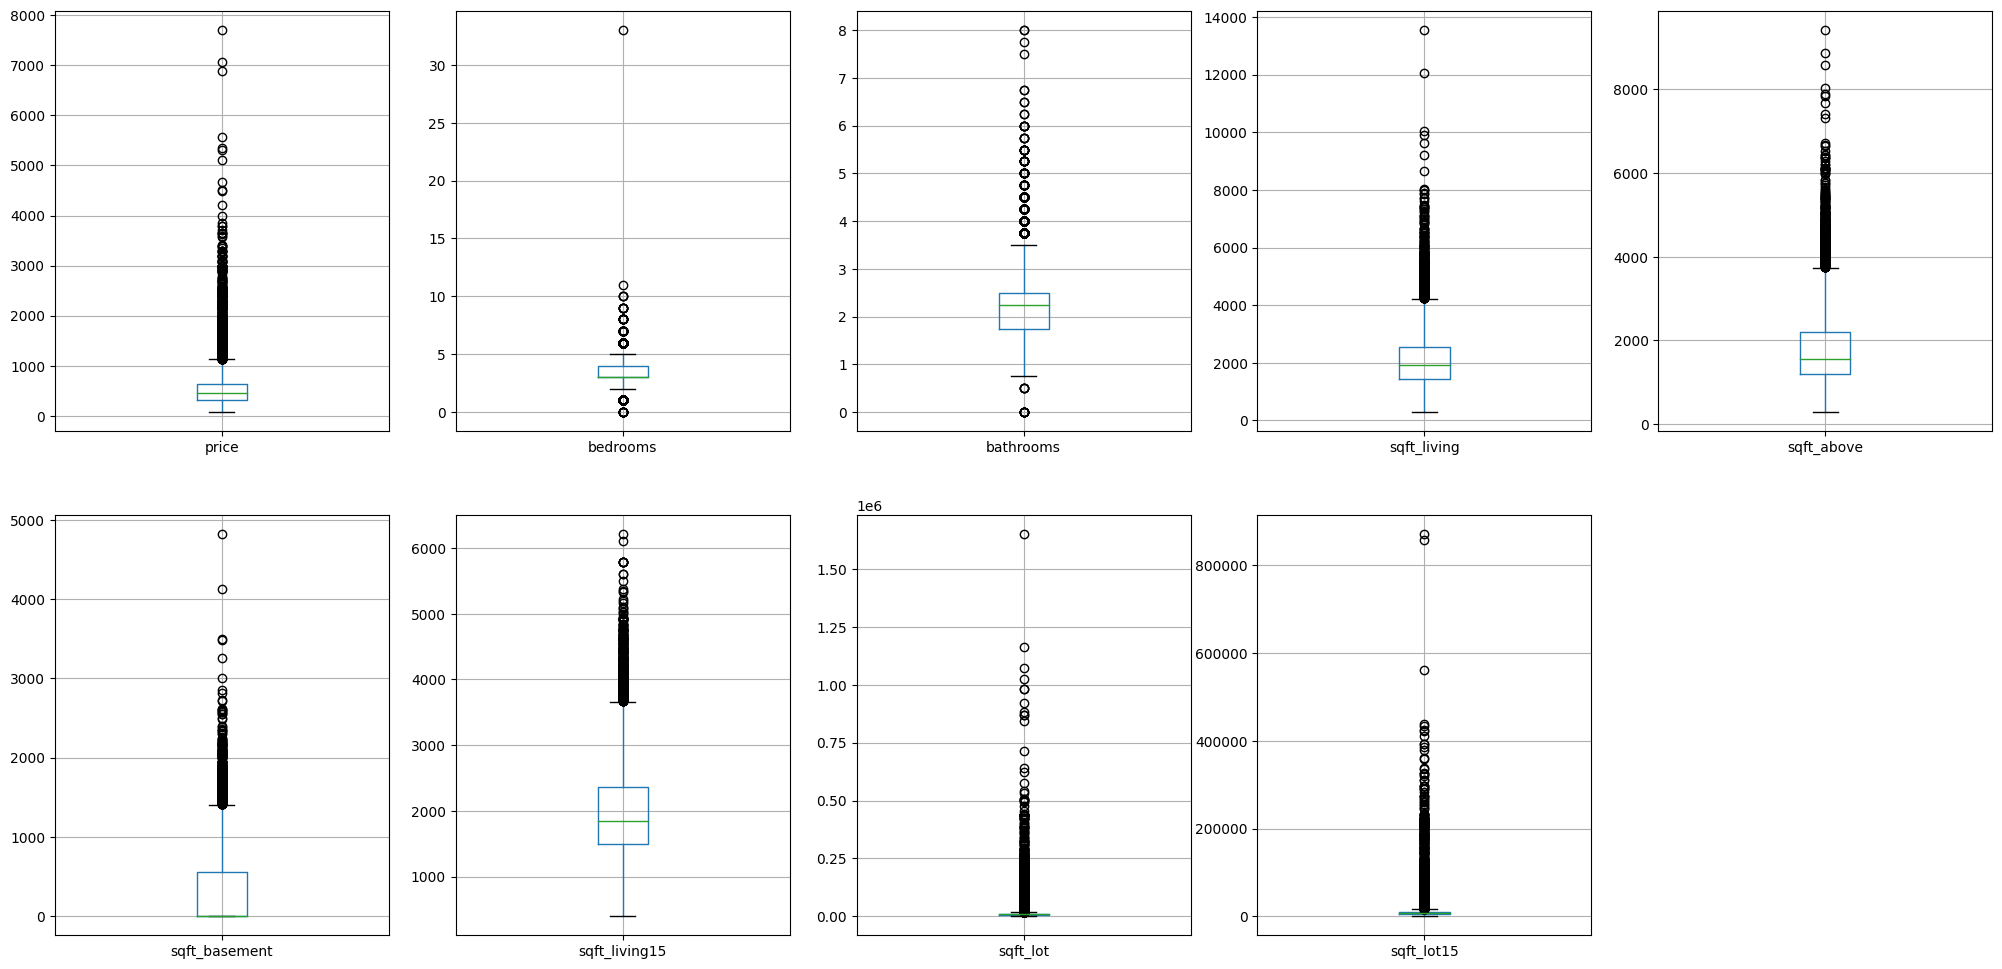

In [15]:
# Boxplot
plt.figure(figsize = (25,12))
plt.subplot(2, 5, 1)
df.boxplot(column = ['price'])
plt.subplot(2, 5, 2)
df.boxplot(column = ['bedrooms'])
plt.subplot(2, 5, 3)
df.boxplot(column = ['bathrooms'])
plt.subplot(2, 5, 4)
df.boxplot(column = ['sqft_living'])
plt.subplot(2, 5, 5)
df.boxplot(column = ['sqft_above'])
plt.subplot(2, 5, 6)
df.boxplot(column = ['sqft_basement'])
plt.subplot(2, 5, 7)
df.boxplot(column = ['sqft_living15'])
plt.subplot(2, 5, 8)
df.boxplot(column = ['sqft_lot'])
plt.subplot(2, 5, 9)
df.boxplot(column = ['sqft_lot15'])
plt.show()

### We are going to remove 0.5% of the highest values.
  - We choose this approach beacause most variables have a few extremely high outliers.

In [16]:
# Choosing numeric columns to calculte the 99.5 percentile
describe_df = df.describe(percentiles=[0.995])
dic_lim = describe_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 
                       'grade', 'sqft_above', 'sqft_basement',  'sqft_living15', 'sqft_lot15']]
dic_lim

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540.09,3.37,2.11,2079.90,15106.97,1.49,0.23,3.41,7.66,1788.39,291.51,1986.55,12768.46
std,367.13,0.93,0.77,918.44,41420.51,0.54,0.77,0.65,1.18,828.09,442.58,685.39,27304.18
min,75.00,0.00,0.00,290.00,520.00,1.00,0.00,1.00,1.00,290.00,0.00,399.00,651.00
50%,450.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,0.00,1840.00,7620.00
99.5%,2453.29,6.00,4.50,5583.16,247342.58,3.00,4.00,5.00,11.00,4820.00,1869.40,4440.00,216892.96
max,7700.00,33.00,8.00,13540.00,1651359.00,3.50,4.00,5.00,13.00,9410.00,4820.00,6210.00,871200.00


In [17]:
# Removing 0.5% of the highest values
df_clean = df.copy()
for i in dic_lim.columns:
  df = df[df[i] <= dic_lim.loc['99.5%', i]]
df.reset_index(drop=True, inplace = True)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00
mean,4610908633.15,514.21,3.34,2.08,2016.34,12148.70,1.49,0.01,0.21,3.41,7.60,1739.24,277.10,1970.70,82.58,98078.64,47.56,-122.22,1952.90,10955.39
std,2877081505.91,288.95,0.87,0.72,803.63,21516.35,0.54,0.08,0.72,0.65,1.10,747.61,413.78,29.37,397.51,53.56,0.14,0.14,637.70,17667.19
min,1000102.00,75.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,460.00,651.00
25%,2140850122.50,319.95,3.00,1.50,1410.00,5000.00,1.00,0.00,0.00,3.00,7.00,1180.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1480.00,5064.00
50%,3940400065.00,445.00,3.00,2.25,1890.00,7502.50,1.00,0.00,0.00,3.00,7.00,1540.00,0.00,1974.00,0.00,98070.00,47.57,-122.23,1820.00,7555.50
75%,7340600234.75,627.00,4.00,2.50,2500.00,10319.00,2.00,0.00,0.00,4.00,8.00,2160.00,540.00,1996.00,0.00,98118.00,47.68,-122.13,2330.00,9900.00
max,9900000190.00,2450.00,6.00,4.50,5570.00,246114.00,3.00,1.00,4.00,5.00,11.00,4780.00,1860.00,2015.00,2015.00,98199.00,47.78,-121.31,4440.00,216057.00


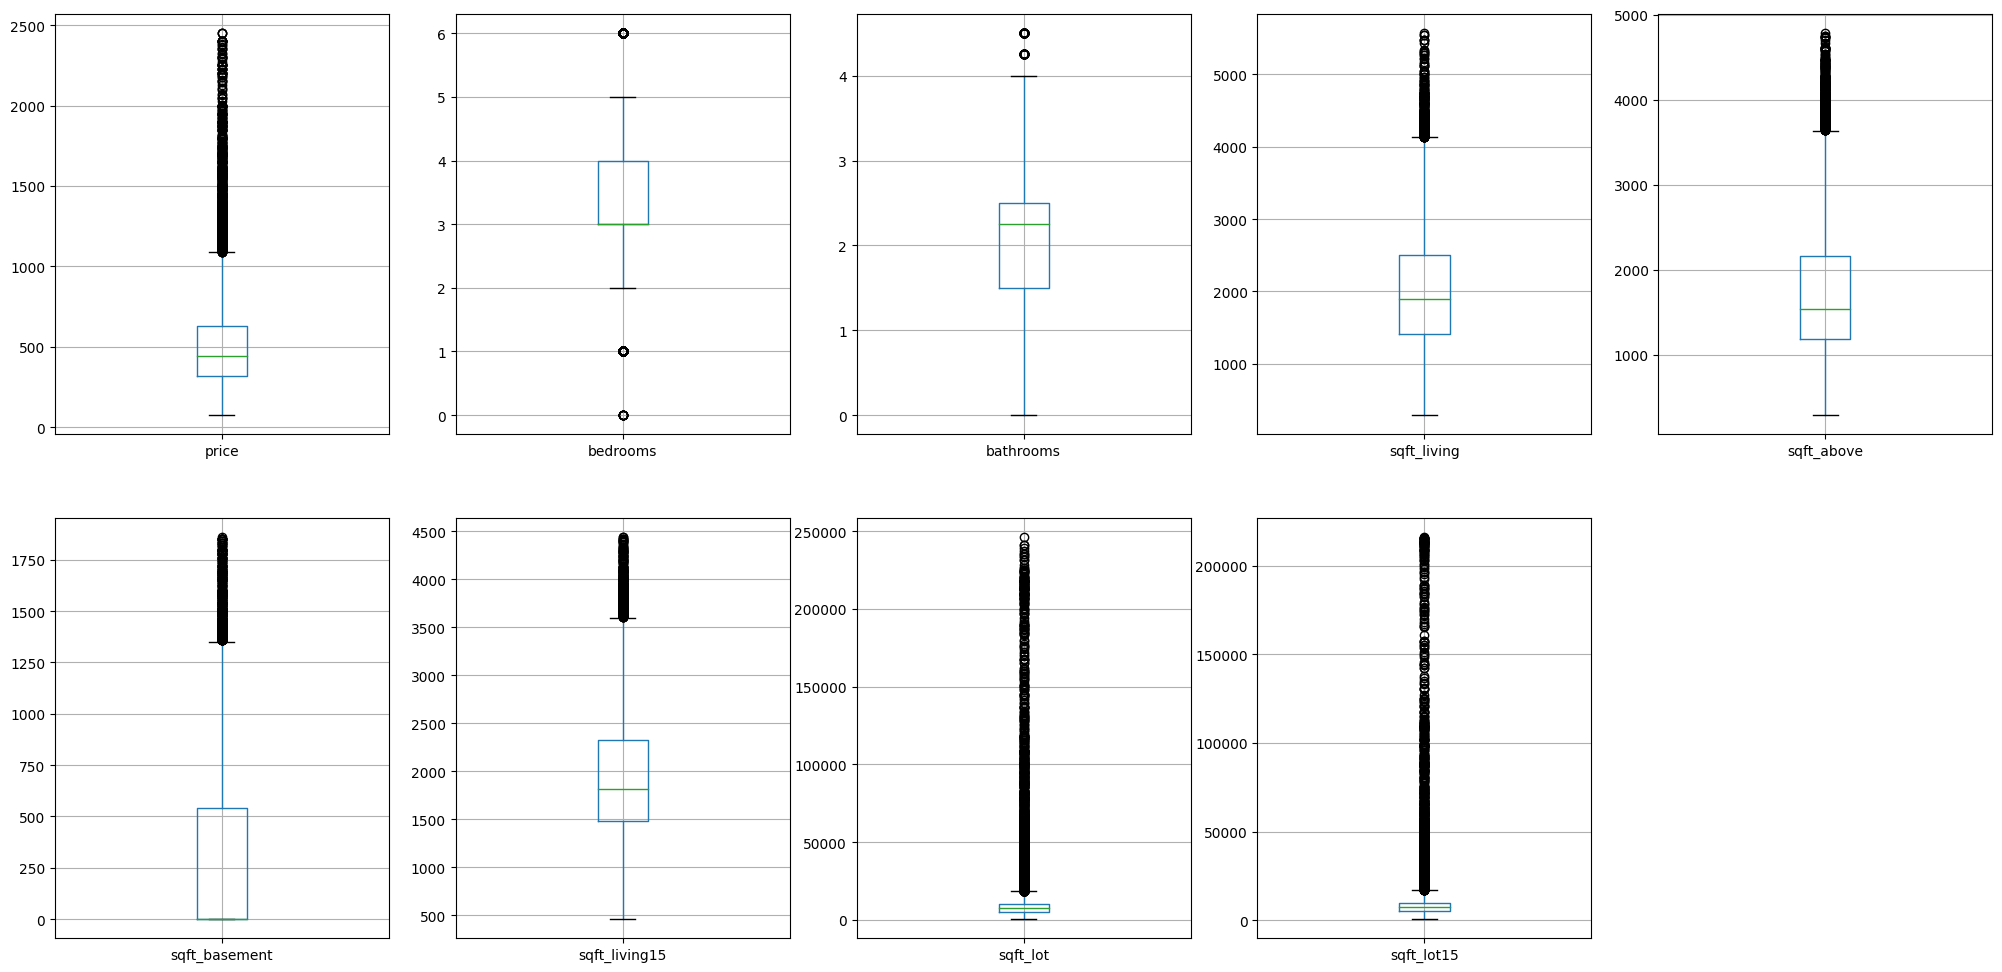

In [18]:
# Boxplot again
plt.figure(figsize = (25,12))
plt.subplot(2, 5, 1)
df.boxplot(column = ['price'])
plt.subplot(2, 5, 2)
df.boxplot(column = ['bedrooms'])
plt.subplot(2, 5, 3)
df.boxplot(column = ['bathrooms'])
plt.subplot(2, 5, 4)
df.boxplot(column = ['sqft_living'])
plt.subplot(2, 5, 5)
df.boxplot(column = ['sqft_above'])
plt.subplot(2, 5, 6)
df.boxplot(column = ['sqft_basement'])
plt.subplot(2, 5, 7)
df.boxplot(column = ['sqft_living15'])
plt.subplot(2, 5, 8)
df.boxplot(column = ['sqft_lot'])
plt.subplot(2, 5, 9)
df.boxplot(column = ['sqft_lot15'])
plt.show()

We still have outliers, but we choose to proceed like this

# Feture Engineer

## Tried to use Nominatim api to find the city of the house by latitude and longitude

The code works, but the geolocator services (unless paid for) are likely to stop working if you try to hit them with many queries in quick succession.


In [19]:
# from geopy.geocoders import Nominatim

In [20]:
# geolocator = Nominatim(user_agent="geoapiExercises")

In [21]:
# Tried to use Nominatim api to find the city of the house by latitude and longitude
# Doesn't work because the geolocator services (unless paid for) are likely to stop working if you try to hit them with many queries in quick succession.
# def get_city_name (row):
#   geolocator = Nominatim(user_agent="geoapiExercises")
#   coord = f"{row['lat']}, {row['long']}"
#   location = geolocator.reverse(coord, exactly_one=True)
#   address = location.raw['address']
#   city = address.get('city','')
#   if city == "":
#     city = address.get('town','')
#   row['city'] = city
#   return row

In [22]:
# dfteste = df.head(300)

In [23]:
# dfteste = dfteste.apply(get_city_name, axis = 1)

In [24]:
# dfteste['city'].value_counts()

## Another way to get the city name, by it's zip code

In [ ]:
# Create a function to get the name of the cities
search = SearchEngine()

def get_city_name(x):
    city = search.by_zipcode(x).major_city
    return city if city else 'None'

In [26]:
# Aplying the function to a new column in the dataframe
df['city'] = df['zipcode'].apply(get_city_name)

In [27]:
# There are 24 different cities
df['city'].nunique()

24

In [28]:
# Number of houses per city
df['city'].value_counts()

Seattle          8858
Renton           1567
Bellevue         1300
Kent             1190
Kirkland          956
Redmond           952
Auburn            892
Federal Way       772
Sammamish         769
Issaquah          708
Maple Valley      576
Woodinville       449
Snoqualmie        299
Kenmore           280
Mercer Island     256
North Bend        206
Enumclaw          203
Bothell           193
Duvall            176
Carnation         107
Vashon            105
Black Diamond      91
Fall City          64
Medina             31
Name: city, dtype: int64

## Add some basic metrics


In [29]:
# Free Area - can be used to expand the house
df['sqft_free'] = df['sqft_lot']-df['sqft_living']

In [30]:
# Price / contructed sqft
df['$/sqft_living'] = round(df['price']/df['sqft_living'], 2)

In [31]:
# Price / Total sqft
df['$/sqft'] = round(df['price']/df['sqft_lot'], 2)

## Identify the houses sold more than once

In [32]:
# Create a list of house id's that have been sold more than once
id_list = []
j = df['id'].value_counts()
for a in j.index:
  if j.loc[a]>=2:
    id_list.append(a)

In [33]:
# Create colum 'sold2_or_more' for houses sold more than once
df.loc[df['id'].isin(id_list), 'sold2_or_more'] = 1
df['sold2_or_more'] = df['sold2_or_more'].fillna(0)
df['sold2_or_more'].value_counts()

0.00    20649
1.00      351
Name: sold2_or_more, dtype: int64

In [34]:
# There are 174  houses sold twice and just 1 sold thrice, totalizing 175 houses sold more than once
df[df['id'].isin(id_list)]['id'].value_counts()

795000620     3
6021501535    2
123039336     2
9238500040    2
8910500150    2
             ..
2206700215    2
2787460720    2
3883800011    2
4154300296    2
7853420110    2
Name: id, Length: 175, dtype: int64

In [35]:
# Ordered the df by id and date to calculate the profit
df = df.sort_values(['id','date']).reset_index(drop=True)

In [ ]:
# We summarize the profit/loss of the houses sold more than once in the line with the last date of sale;
df['profit'] = 0
df['fst_price'] = 0
df['lst_price'] = 0
for i in range(0, df.shape[0]):
  if (df.iloc[i,0] == df.iloc[i-1,0]) and (df.loc[i-1,'profit'] == 0):
    df['profit'].iloc[i] = df.iloc[i,2] - df.iloc[i-1,2]
    df['fst_price'].iloc[i] = df.iloc[i-1,2]
    df['lst_price'].iloc[i] = df.iloc[i,2]
  elif (df.iloc[i,0] == df.iloc[i-1,0]) and (df.loc[i-1,'profit'] != 0):
    df['profit'].iloc[i] = df.iloc[i,2] - df.iloc[i-1,2] + df.iloc[i-1,26]
    df['fst_price'].iloc[i] = df.iloc[i-2,2]
    df['lst_price'].iloc[i] = df.iloc[i,2]

In [37]:
# Creating a df with all records of the houses sold more than once
df_full_sold2=(df.loc[df['id'].isin(id_list)])

In [38]:
# Removing the older lines of the houses sold more than once;
# Were excluded 176 lines. 175 left with data on "profit" for all of them. 
# We create a new data frame "df_sold2" with only those 175 houses. 

index_to_drop = []
for b in df_full_sold2['id'].unique():
  for a in df_full_sold2.loc[df_full_sold2['id'] == b][0:len(df_full_sold2.loc[df_full_sold2['id'] == b])-1].index.values:
    index_to_drop.append(a)
df_sold2 = df_full_sold2.drop(index_to_drop,  inplace = False)

## Remove some features

In [ ]:
# Zipcode, latitude and longitude are no longer usefull.
df.drop(['zipcode', 'lat', 'long'], axis = 1, inplace = True)
df_sold2.drop(['zipcode', 'lat', 'long'], axis = 1, inplace = True)
df_full_sold2.drop(['zipcode', 'lat', 'long'], axis = 1, inplace = True)

# Exploratory Analysis

## All Houses

<Axes: title={'center': 'Sales volume by month'}, xlabel='Month', ylabel='Sales volume'>

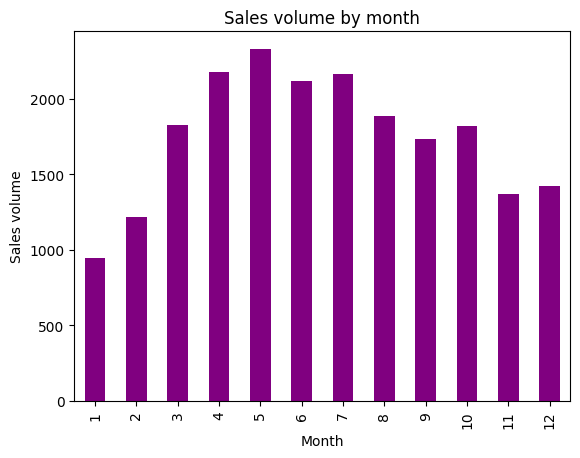

In [40]:
# Sales volume by month
# The highest 4 are may, april, july and june
df.groupby(df['date'].dt.month)['id'].count().plot(kind='bar', color="purple", title = "Sales volume by month", xlabel = "Month", ylabel = "Sales volume")

<Axes: title={'center': 'Cumulative sales by month'}, xlabel='Month', ylabel='Sum of sales (M)'>

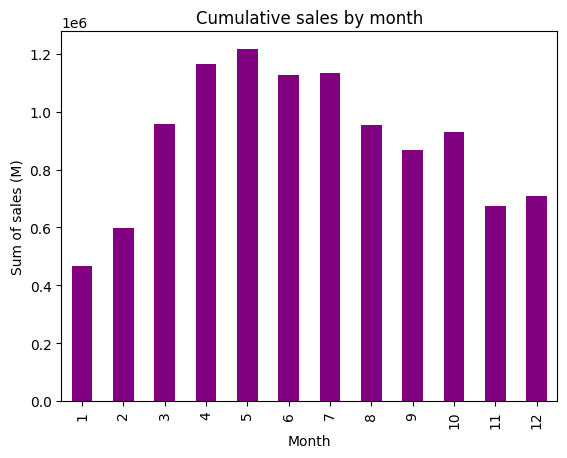

In [41]:
# Cumulative sales by month
# The highest 4 are also may, april, july and june
# The sales volume are followed by the cummulative sales, they had the same highest 4 months.
df.groupby(df['date'].dt.month)['price'].sum().plot(kind='bar', color="purple", title = "Cumulative sales by month", xlabel = "Month", ylabel = "Sum of sales (M)")

<Axes: title={'center': 'Average Price per Month'}, xlabel='M o n t h', ylabel='P r i c e'>

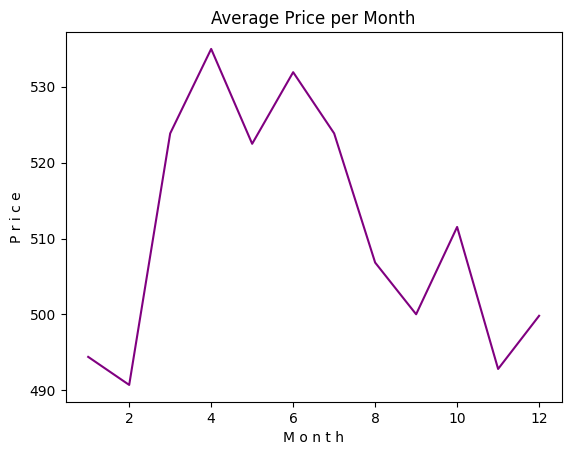

In [42]:
# Average prices for houses are lower between November and February
df.groupby(df['date'].dt.month)['price'].mean().plot(kind='line', color="purple", title = "Average Price per Month", xlabel = "M o n t h", ylabel = "P r i c e")

In [43]:
# Distribution of the cities of the houses
# 42,18% of the houses are located in Seattle
df['city'].value_counts().head(10)/df.shape[0]*100

Seattle       42.18
Renton         7.46
Bellevue       6.19
Kent           5.67
Kirkland       4.55
Redmond        4.53
Auburn         4.25
Federal Way    3.68
Sammamish      3.66
Issaquah       3.37
Name: city, dtype: float64

In [44]:
print('The average price is ${}k'.format(df['price'].mean().round(2)))

The average price is $514.21k


In [45]:
# Shown were average price, number of houses per city and average price per square foot. The first 9 cities have average prices that are higher than the general average price ($514.21k)
# Although more than 42% of the houses are located in Seattle, Medina has the highest average price and highest price per square foot, followed by Mercer Island
df.groupby('city').agg({'price':'mean', 'id' : 'count', '$/sqft_living' : 'mean' }).sort_values(by = '$/sqft_living', ascending = False).head(10)

,price,id,$/sqft_living
city,,,
Medina,1547.67,31,0.56
Mercer Island,1080.66,256,0.38
Bellevue,803.58,1300,0.34
Seattle,519.41,8858,0.30
Kirkland,614.19,956,0.30
Vashon,473.24,105,0.28
Redmond,642.56,952,0.28
Sammamish,706.17,769,0.27
Issaquah,589.57,708,0.26


## We decided to analyze the characteristics of houses that have been sold more than once

In [46]:
df_sold2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,sqft_living15,sqft_lot15,sqft_free,$/sqft_living,$/sqft,sold2_or_more,profit,fst_price,lst_price
count,175.00,175.00,175.00,175.00,175.00,175.00,175.00,175.00,175.00,175.00,...,175.00,175.00,175.00,175.00,175.00,175.00,175.00,175.00,175.00,175.00
mean,4547638710.99,484.66,3.28,1.80,1727.83,11636.94,1.27,0.00,0.12,3.30,...,45.25,1764.13,10647.65,9909.11,0.29,0.07,1.00,137.34,347.31,484.66
std,2883691644.47,282.16,1.03,0.73,729.13,22924.28,0.43,0.00,0.63,0.70,...,296.68,588.39,16533.01,22649.41,0.12,0.06,0.00,100.07,280.80,282.16
min,1000102.00,157.00,1.00,0.75,580.00,1092.00,1.00,0.00,0.00,1.00,...,0.00,810.00,1334.00,44.00,0.12,0.00,1.00,-40.00,82.00,157.00
25%,1984750110.00,300.00,3.00,1.00,1220.00,5542.50,1.00,0.00,0.00,3.00,...,0.00,1360.00,6000.00,4085.00,0.20,0.03,1.00,65.00,180.00,300.00
50%,4031000520.00,419.95,3.00,1.75,1600.00,7980.00,1.00,0.00,0.00,3.00,...,0.00,1610.00,7920.00,6363.00,0.26,0.05,1.00,122.30,260.00,419.95
75%,7456860762.50,584.25,4.00,2.25,2075.00,10072.00,1.50,0.00,0.00,4.00,...,0.00,2010.00,9561.50,8350.50,0.34,0.09,1.00,200.00,407.50,584.25
max,9834200885.00,1940.00,6.00,4.50,5290.00,224442.00,3.00,0.00,4.00,5.00,...,1990.00,3860.00,183897.00,219152.00,0.81,0.37,1.00,529.95,1895.00,1940.00


In [47]:
# No 'waterfront' house sold more than once, so we drop this column
df_sold2.drop(['waterfront'], axis = 1, inplace = True)

In [48]:
# Verifying houses sold more than once with 'profit' <= 0
# As we can see, some houses had losses between sales
# 5 out of 175 houses had a deficit
# 3 out of 175 were sold more than once at the same price
# 167 that were sold more than once had a profit

df_sold2.loc[df['profit']<= 0].sort_values('profit')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_living15,sqft_lot15,city,sqft_free,$/sqft_living,$/sqft,sold2_or_more,profit,fst_price,lst_price
15078,7167000040,2015-03-05,700.00,4,3.00,3350,199253,2.00,0,3,...,3350,183897,Black Diamond,195903,0.21,0.00,1.00,-40.00,740.00,700.00
6798,2726049071,2015-04-08,489.95,2,1.00,820,4206,1.00,0,3,...,1810,7200,Seattle,3386,0.60,0.12,1.00,-20.05,510.00,489.95
6902,2767603612,2015-01-13,489.00,2,2.25,1290,1334,3.00,0,3,...,1350,1334,Seattle,44,0.38,0.37,1.00,-11.00,500.00,489.00
18635,8682262400,2015-05-13,419.95,2,1.75,1350,4003,1.00,0,3,...,1350,4479,Redmond,2653,0.31,0.10,1.00,-10.05,430.00,419.95
6587,2619920170,2014-12-19,765.00,4,2.50,3230,4290,2.00,0,3,...,3220,5083,Kirkland,1060,0.24,0.18,1.00,-7.50,772.50,765.00
4384,1825069031,2014-10-16,550.00,4,1.75,2410,8447,2.00,3,4,...,2520,14789,Sammamish,6037,0.23,0.07,1.00,0.00,550.00,550.00
13911,6308000010,2015-04-23,585.00,3,2.50,2290,5089,2.00,0,3,...,2290,7984,Bellevue,2799,0.26,0.11,1.00,0.00,585.00,585.00
18390,8648900110,2014-08-26,555.00,3,2.50,1940,3211,2.00,0,3,...,1880,3078,Issaquah,1271,0.29,0.17,1.00,0.00,555.00,555.00


In [49]:
print('The average profit of houses sold more than once is {}k'.format(df_sold2['profit'].mean().round(2)))

The average profit of houses sold more than once is 137.34k


<ipython-input-50-84552f92768e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sold2['profit'], color="blue", label="Compact",)


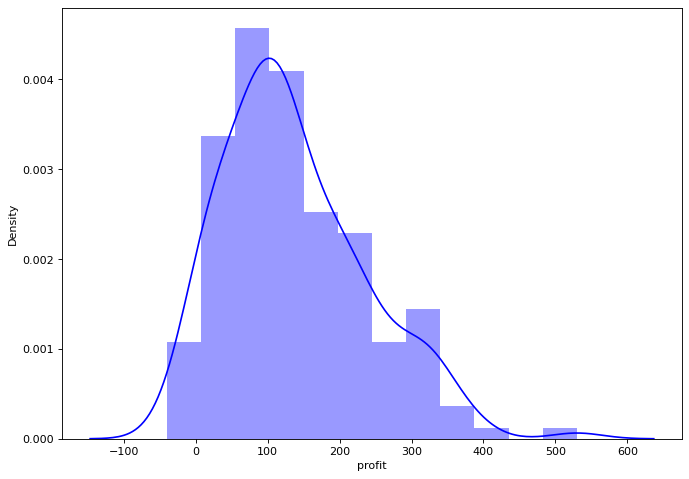

In [50]:
# Distribution plot for profit
# Doesn't look like a normal distribution
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df_sold2['profit'], color="blue", label="Compact",)

plt.show()


In [51]:
# Normality test
# Isn't a normal distribution 

alpha = 0.05
k2, p = normaltest(df_sold2['profit'])

# Null hypothesis: 'profit' follow a normal distribution
# Alternative hypothesis: 'profit' does not follow a normal distribution

if p < alpha:
  pd.set_option("float_format","{:.5f}".format)
  print("The null hypothesis can be rejected, because p < 0.05")
else:
    print("The null hypothesis can't be rejected, because p > 0.05")

The null hypothesis can be rejected, because p < 0.05


In [52]:
# Distribution of the houses sold more than once
# 49.71% of the houses are located in Seattle
df_sold2['city'].value_counts().head(10)/df_sold2.shape[0]*100

Seattle       49.71429
Renton         9.71429
Federal Way    6.28571
Bellevue       6.28571
Kent           4.57143
Sammamish      4.00000
Redmond        3.42857
Auburn         2.85714
Snoqualmie     1.71429
Kirkland       1.71429
Name: city, dtype: float64

In [53]:
print('The average $/sqft_living of houses sold more than once is {}k'.format(df_sold2['$/sqft_living'].mean().round(2)))

The average $/sqft_living of houses sold more than once is 0.29k


In [54]:
# The top 10 by average price, profit and price per square foot, as well as the number of houses per city.. 
# The 9 most profitable cities had an average profit of over 100 k
# The first 5 cities showed an average profit that was higher than the average total profit ($137.34k )
# Bothell has the highest average profit, but with only 1 house.
# Despite the average profit below the total average profit, Bellevue has the highest average price, the only one above 1 million. With 11 houses, is the 3 # higher in number of houses and 2 # in price per square foot
df_sold2.groupby('city').agg({'price':'mean', 'id' : 'count', 'profit' : 'mean','$/sqft_living' : 'mean' }).sort_values(by = 'profit', ascending = False).head(10)

,price,id,profit,$/sqft_living
city,,,,
Bothell,470.00000,1,210.00000,0.28000
Kirkland,694.13333,3,189.96667,0.27667
Seattle,467.74356,87,175.48654,0.32218
Kenmore,647.50000,1,167.50000,0.37000
Sammamish,579.14286,7,164.39286,0.27143
Bellevue,1038.13827,11,110.99282,0.38909
Vashon,329.00000,1,108.50000,0.33000
Kent,261.84375,8,104.05937,0.20250
Renton,320.67353,17,101.53676,0.20706


In [55]:
# The last 5 on average price, profit, and price per square foot, along with the number of houses per city.
# On average, Black Diamond was the only city to record losses, but only 1 house was sold more than once.
df_sold2.groupby('city').agg({'price':'mean', 'id' : 'count', 'profit' : 'mean','$/sqft_living' : 'mean' }).sort_values(by = 'profit', ascending = True).head(5)

,price,id,profit,$/sqft_living
city,,,,
Black Diamond,700.00000,1,-40.00000,0.21000
Issaquah,660.00000,2,4.00000,0.26500
Carnation,471.00000,1,27.50000,0.23000
Snoqualmie,523.66667,3,40.54467,0.25667
Medina,940.00000,1,65.00000,0.77000


In [56]:
# Seattle has a great average profit along with a good amount of houses for sale.
# Bellevue has the most expensive houses and a higher price per square foot. There is also a good amount of profitable houses here

In [57]:
# Display the difference between the first and the last sale price of the houses sold more than once
import plotly.express as px
import plotly.graph_objects as go

fig = px.line()

fig.update_layout(
    template='simple_white',
    font=dict(size=15),
    yaxis_title='Price ($ / 1000 )', 
    xaxis_title = "House's index",
    title={
        'text': "The first and last sale price comparisson, along with profit",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01),
    legend_title = '',
    #showlegend=False,
    hovermode="x",
   )

fig.add_trace(go.Scatter(y=df_sold2.reset_index()['fst_price'],
                    mode='lines',
                    name='First Sale Price',
                    line_color = '#3283fe'))
fig.add_trace(go.Scatter(y=df_sold2.reset_index()['lst_price'],
                    mode='lines',
                    name='Last Sale Price',
                    line_color = '#fd3216'))

fig.add_trace(go.Scatter(y=df_sold2.reset_index()['profit'],
                    mode='lines+markers',
                    name='Profit/Deficit',
                    line_color = '#2ca02c'))
fig.add_hline(y=0, 
              line_width=2.5, 
              line_dash="dot", line_color="black",
              annotation_text="Deficit", 
              annotation_position="bottom left",
              annotation_font_size=15,
              annotation_font_color="Red"
              )
fig.add_hline(y=df_sold2['price'].mean(), 
              line_width=2.5, 
              line_dash="dot", line_color="black",
              annotation_text="Average Price", 
              annotation_position="bottom left",
              annotation_font_size=15,
              annotation_font_color="Red"
              )
fig.show()

In [58]:
print('Of the houses that have been sold more than once, there are {} houses whose last sale price is higher than the average sale price of all houses'.format(df_sold2[df_sold2['lst_price'] > df['price'].mean()]['id'].count()))

Of the houses that have been sold more than once, there are 65 houses whose last sale price is higher than the average sale price of all houses


<Axes: title={'center': 'Sales volume by month'}, xlabel='Month', ylabel='Sales volume'>

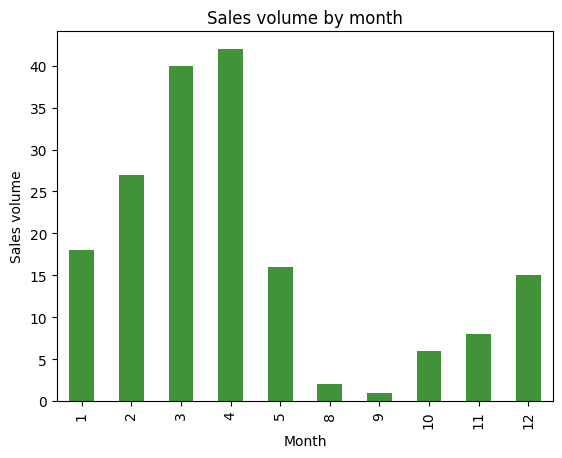

In [59]:
# Number of houses sold per month

# March and April are the months with the most sales
# June and July had no sales

df_sold2.groupby(df_sold2['date'].dt.month)['id'].count().plot(kind='bar', color = "#419238", title = "Sales volume by month", xlabel = "Month", ylabel = "Sales volume")


<Axes: title={'center': 'Cumulative profit by month'}, xlabel='Month', ylabel='Sum of profit'>

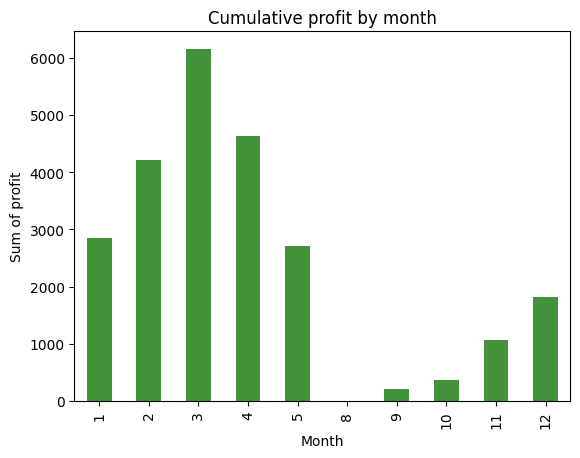

In [60]:
# Cumulative profit per month
df_sold2.groupby(df_sold2['date'].dt.month)['profit'].sum().plot(kind='bar', color = "#419238", title = "Cumulative profit by month", xlabel = "Month", ylabel = "Sum of profit")

<Axes: xlabel='date'>

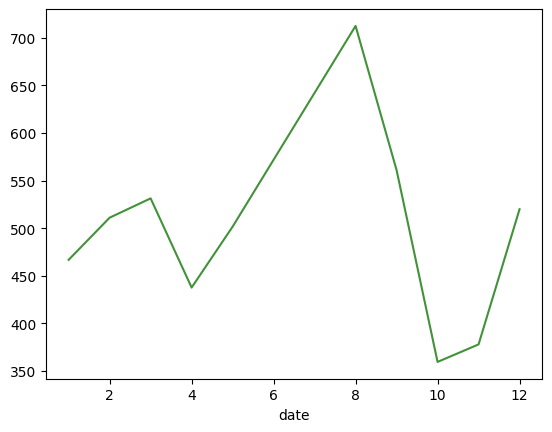

In [61]:
# The average price of houses sold more than once is lower in October and November
df_sold2.groupby(df_sold2['date'].dt.month)['price'].mean().plot(kind='line', color = "#419238")

<Axes: title={'center': 'Sales volume by month'}, xlabel='Month', ylabel='Sales volume'>

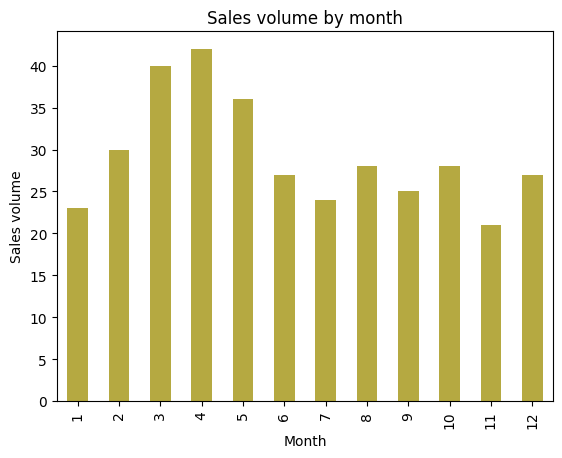

In [62]:
# Number of houses sold per month - For all records of houses sold more than once 'df_full_sold2'
df_full_sold2.groupby(df_full_sold2['date'].dt.month)['id'].count().plot(kind='bar', color = "#B5A941", title = "Sales volume by month", xlabel = "Month", ylabel = "Sales volume")

In [63]:
# Many houses were sold in June and July, but their prices were higher when they were sold in other months because there are no records of profit in June and July

# EDA with sweetviz

In [ ]:
feature_config = sv.FeatureConfig(skip=['date', 'sold2_or_more', 'id', 'fst_price', 'lst_price'])
eda = sv.analyze(source = df_sold2, target_feat = 'profit', feat_cfg = feature_config)


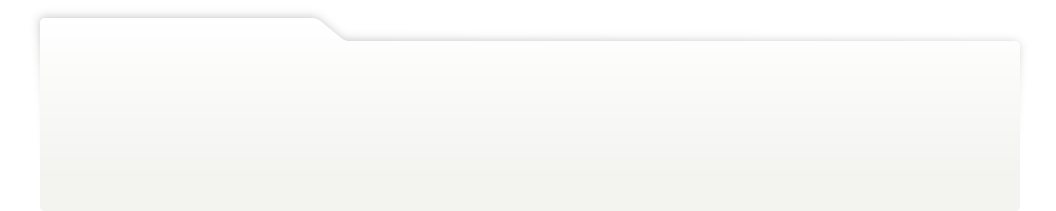
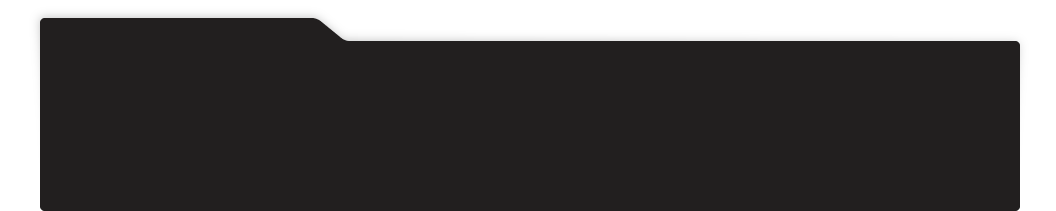
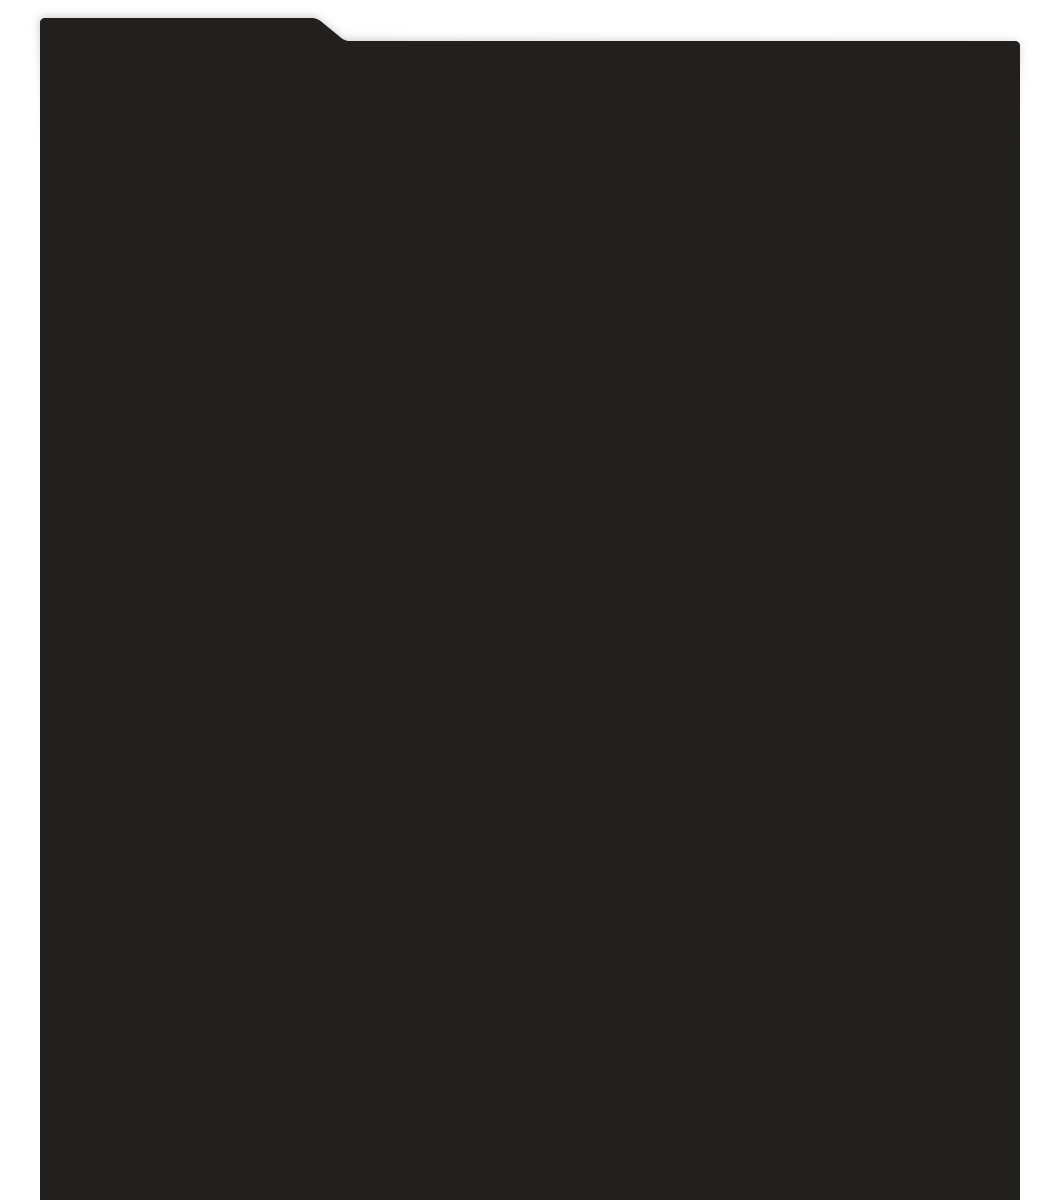
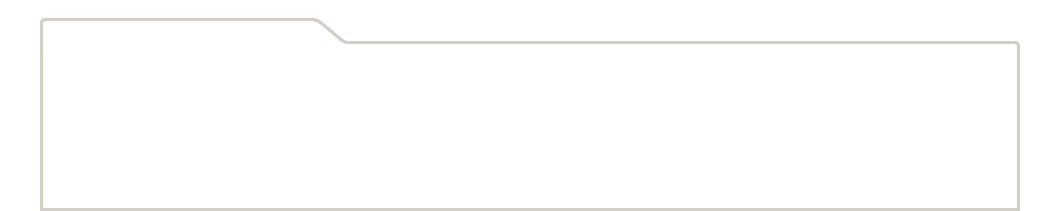
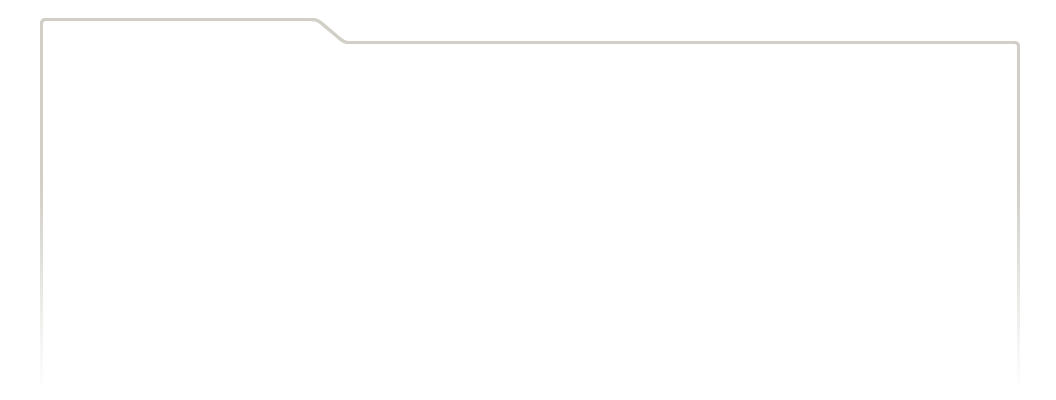
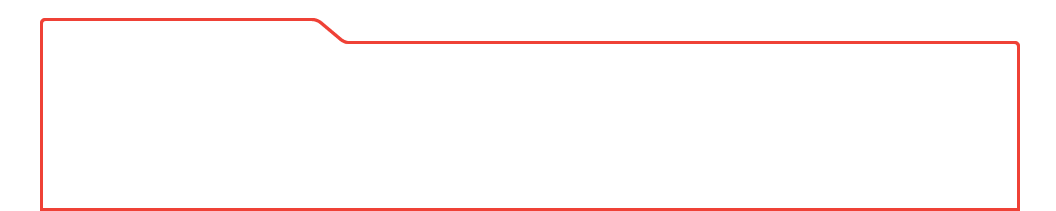
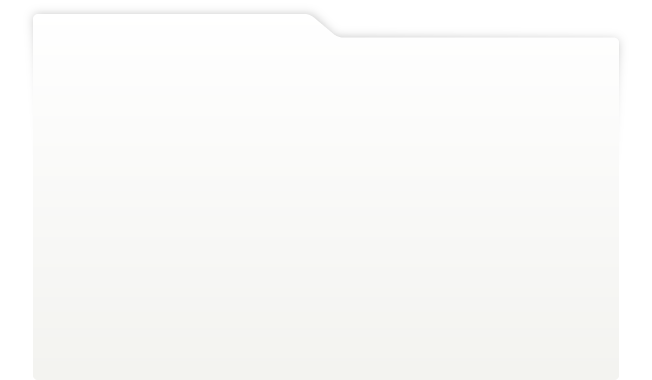
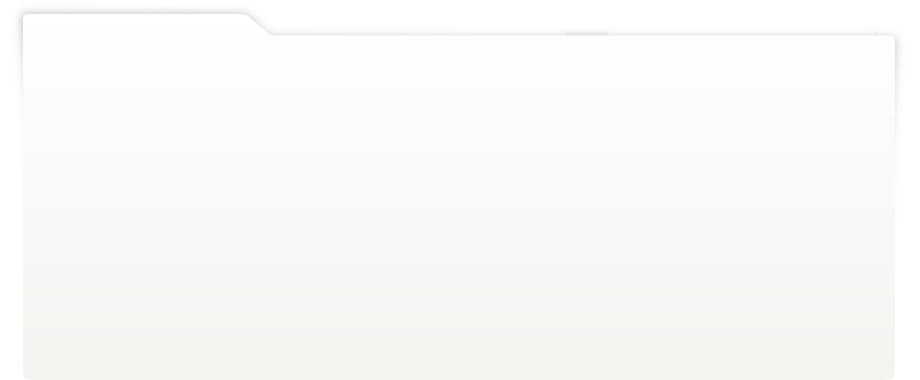
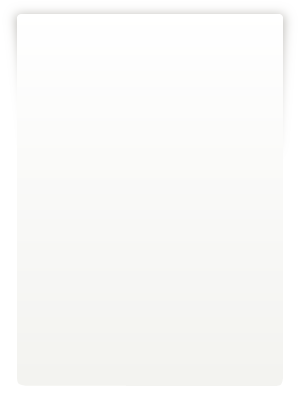
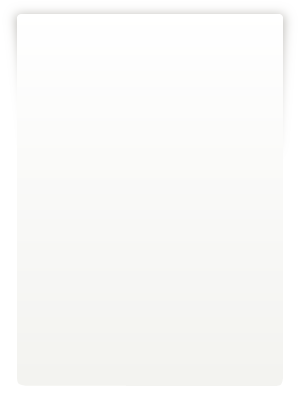
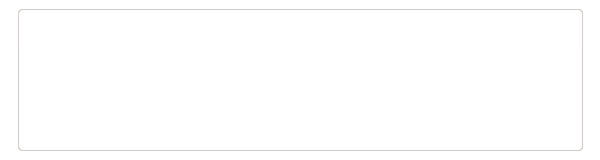
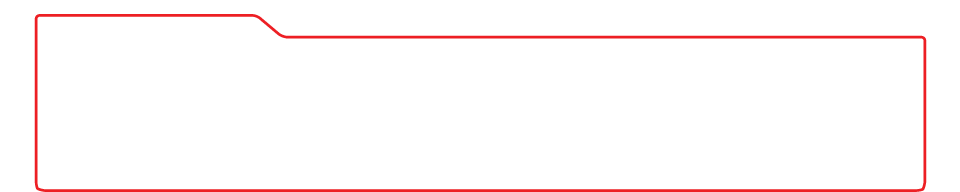
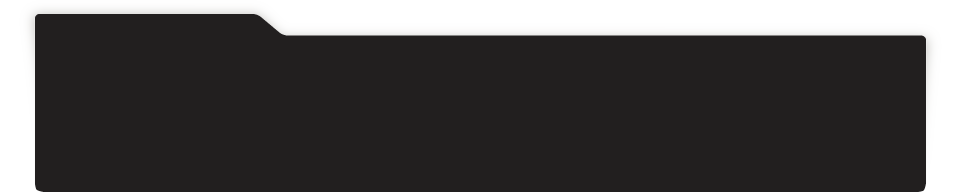
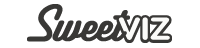
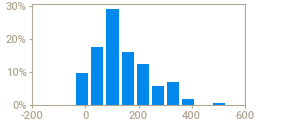
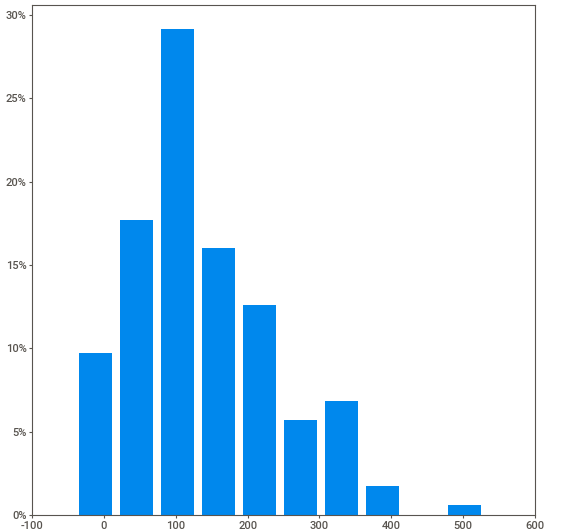
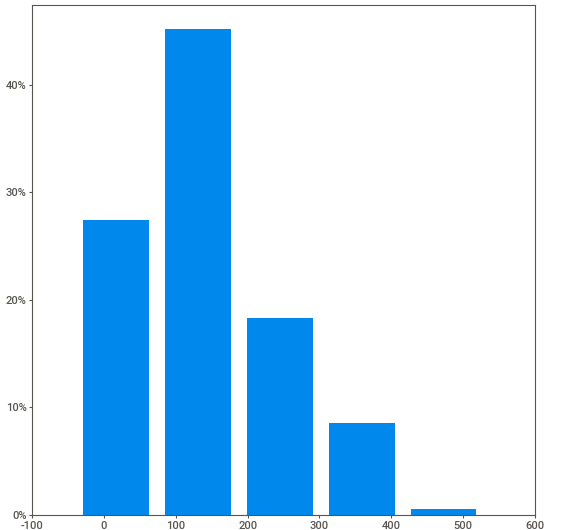
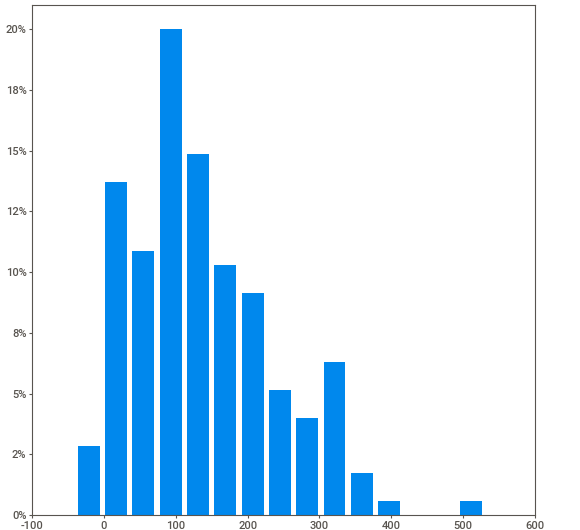
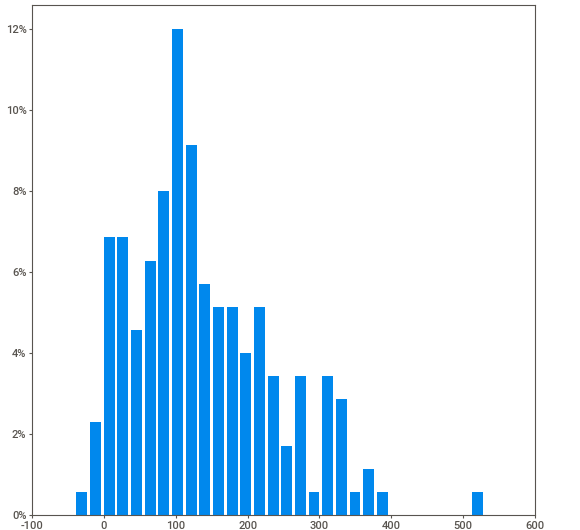
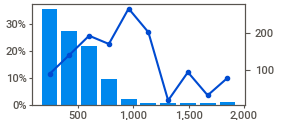
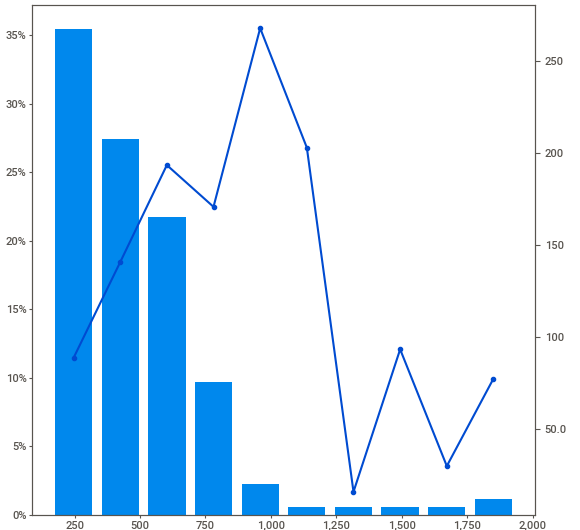
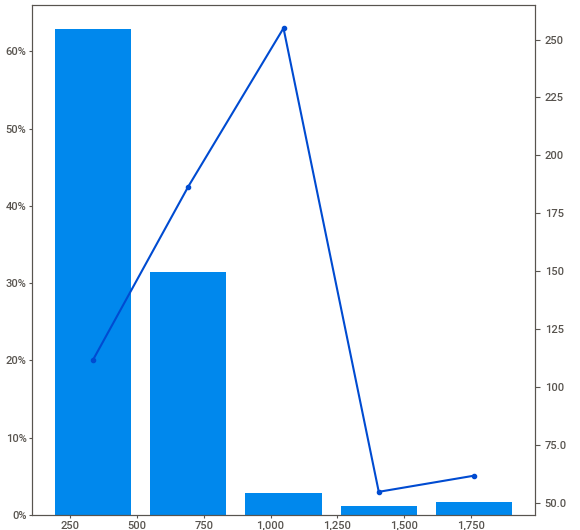
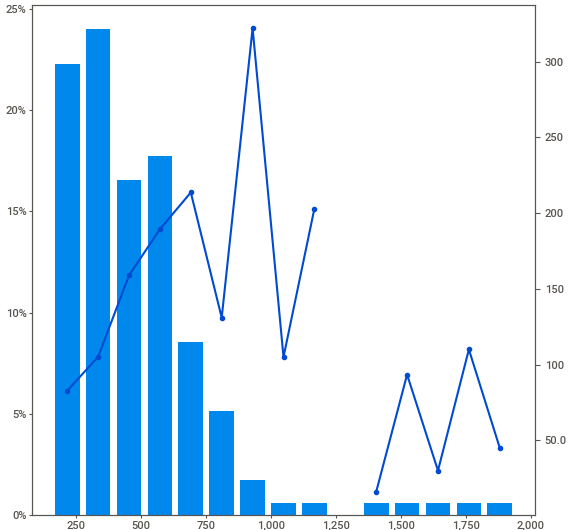
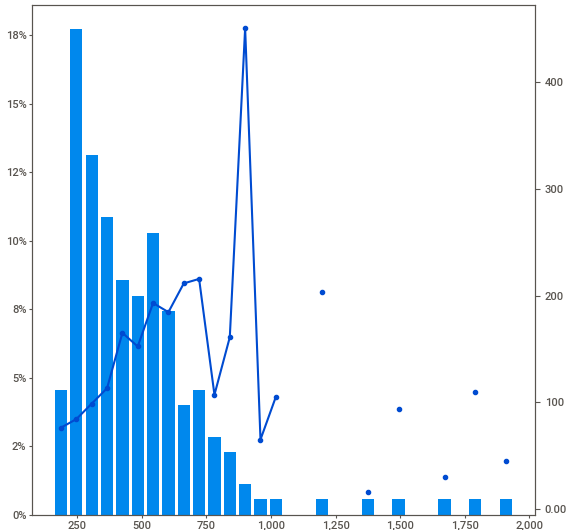
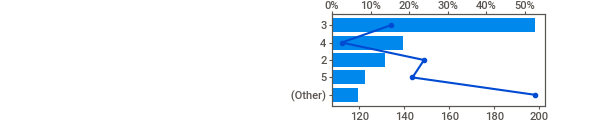
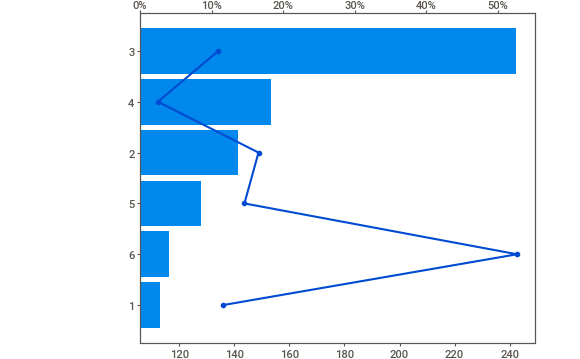
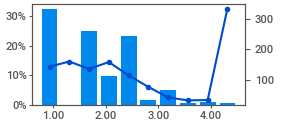
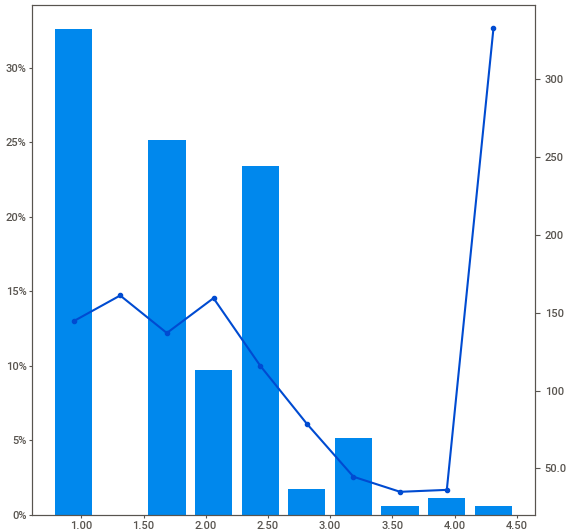
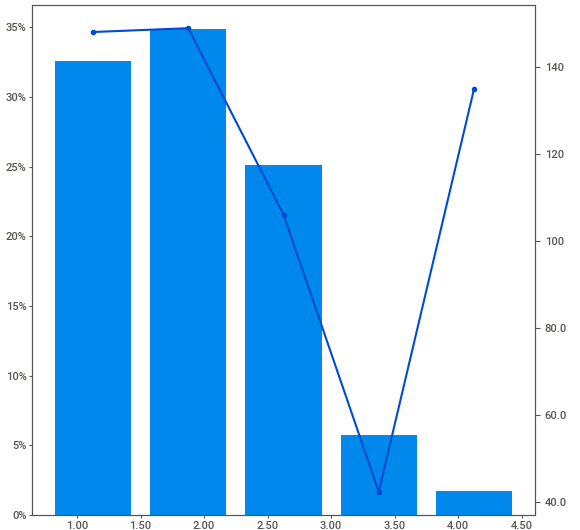
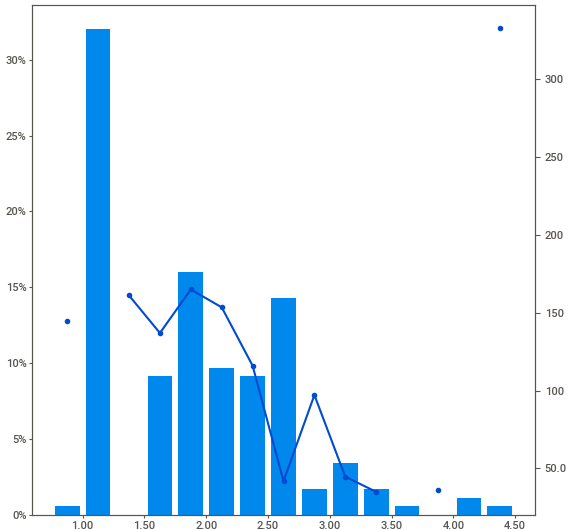
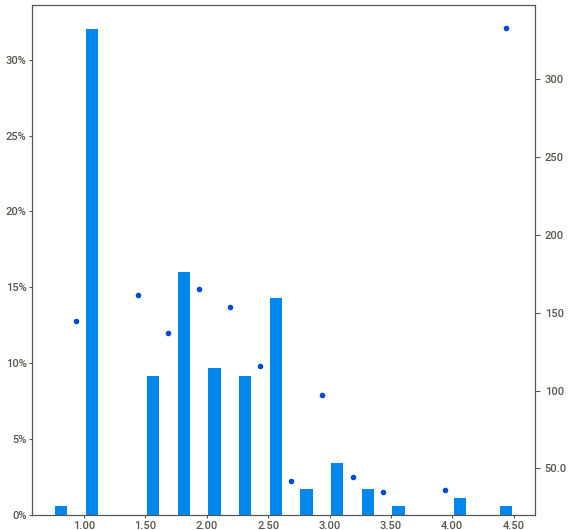
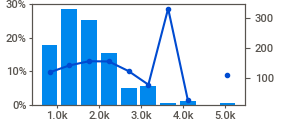
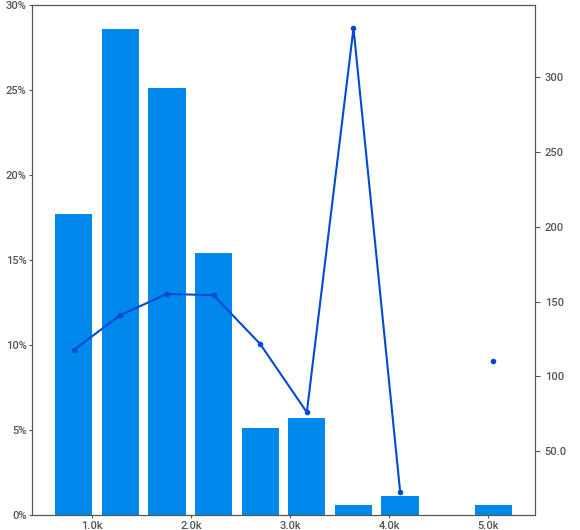
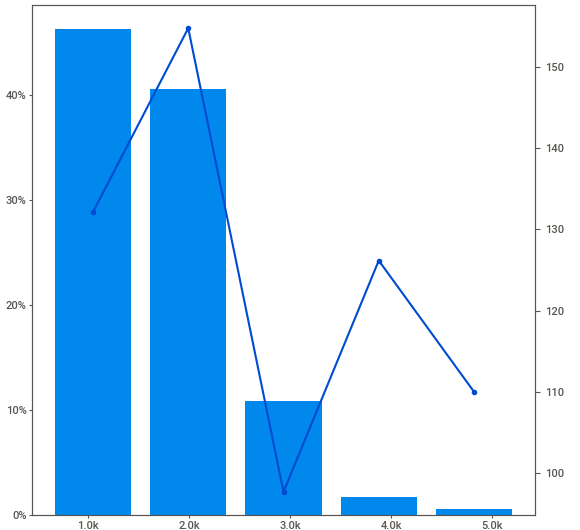
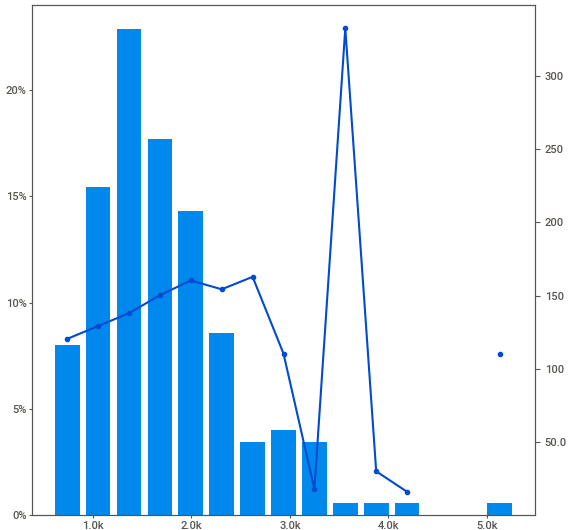
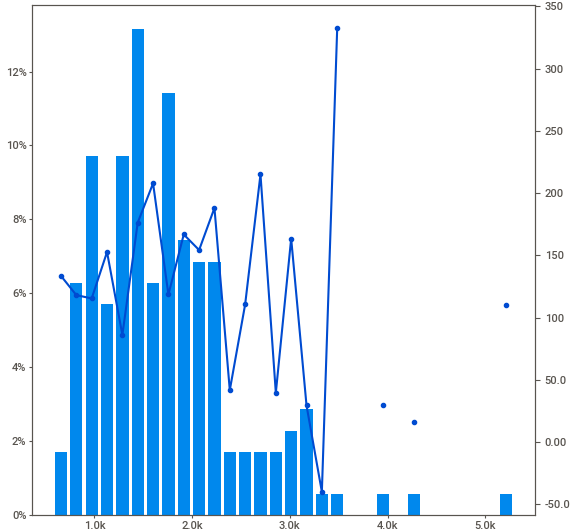
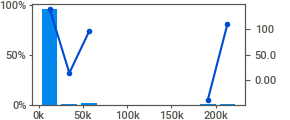
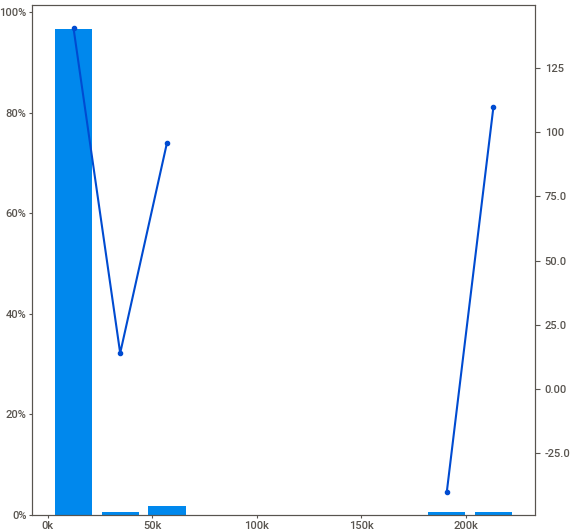
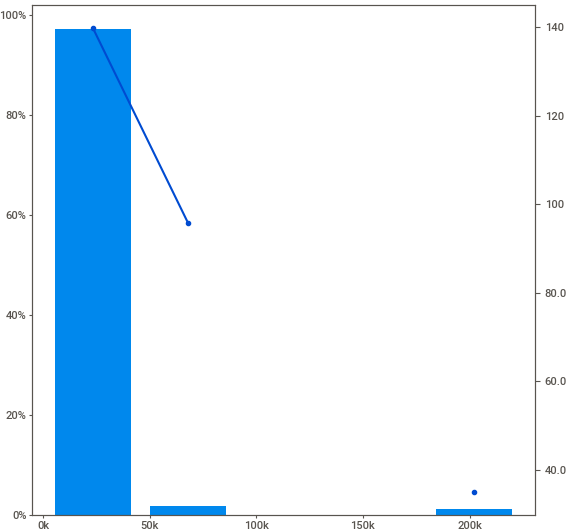
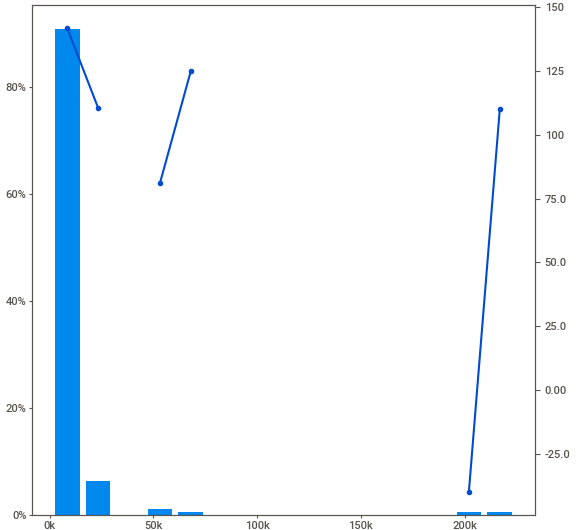
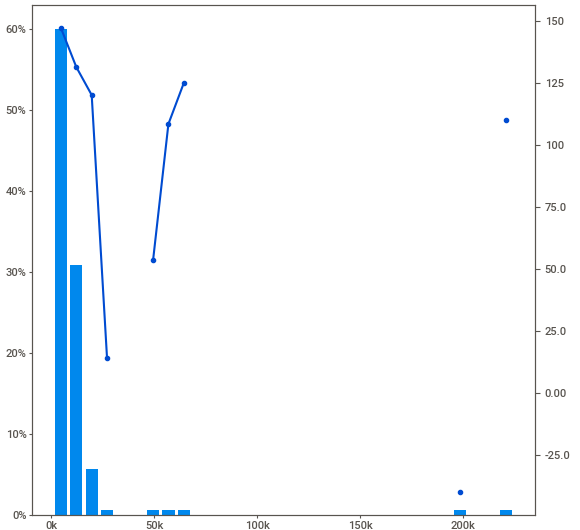
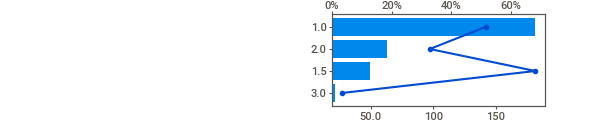
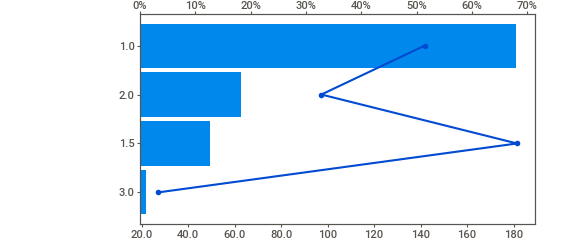
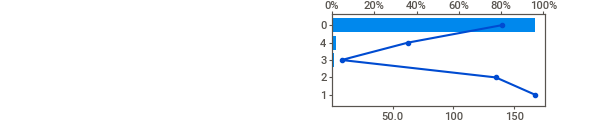
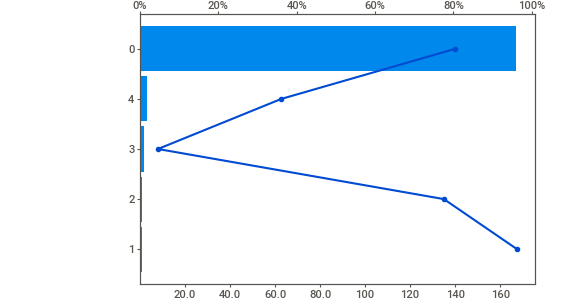
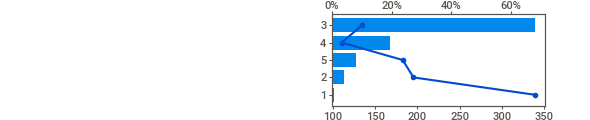
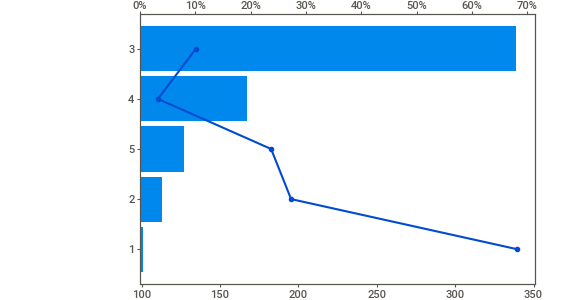
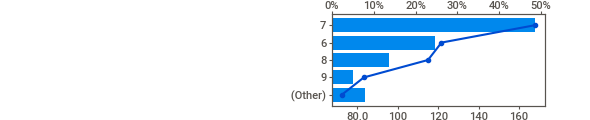
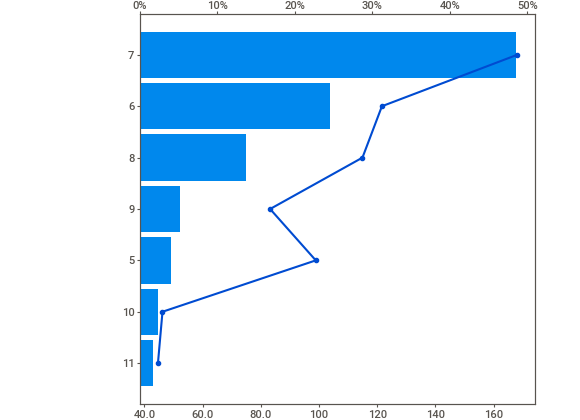
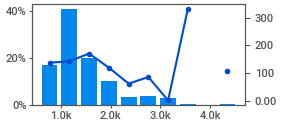
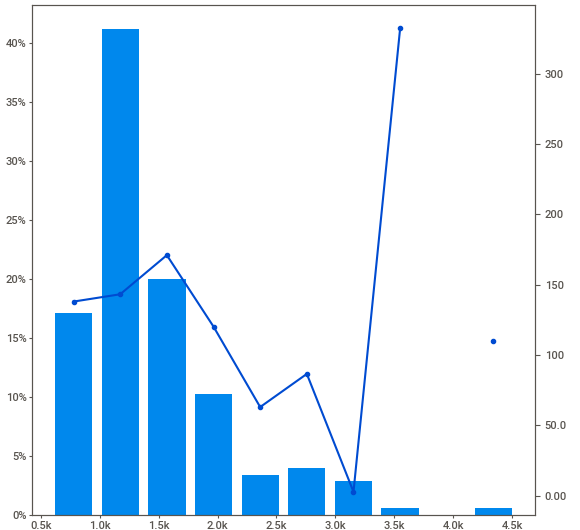
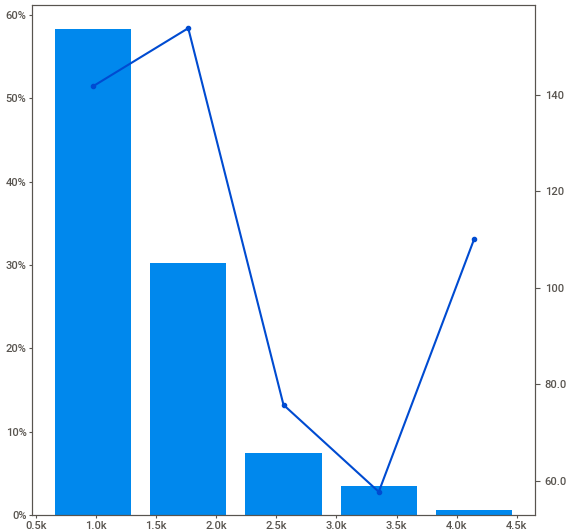
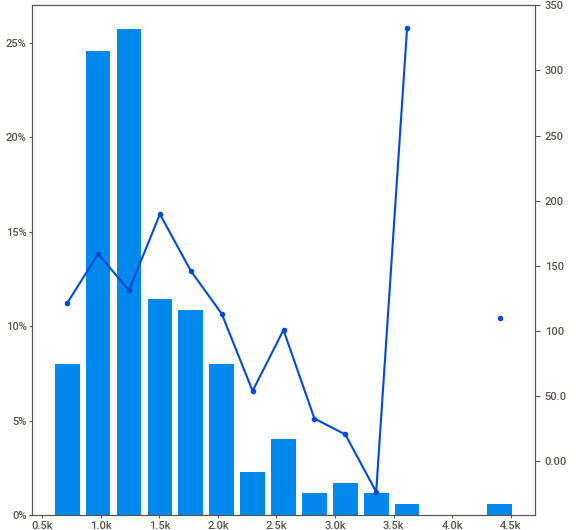
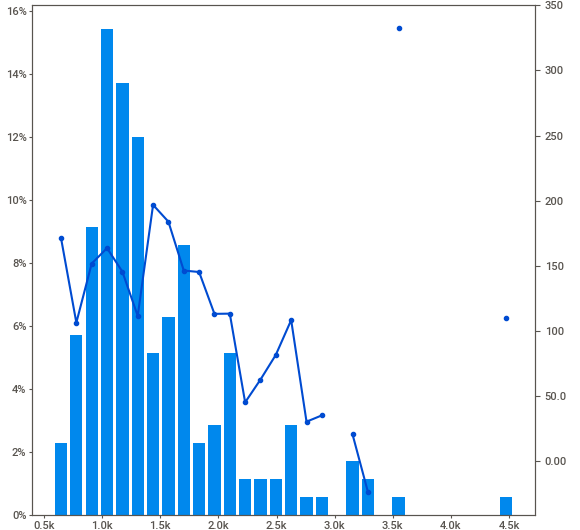
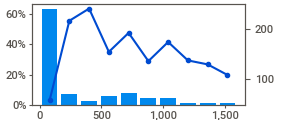
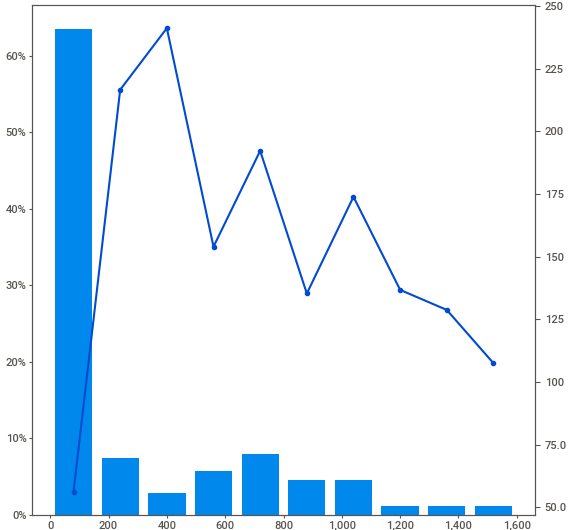
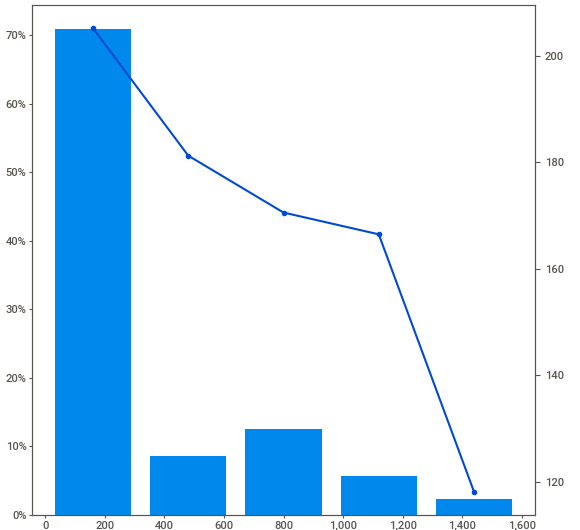
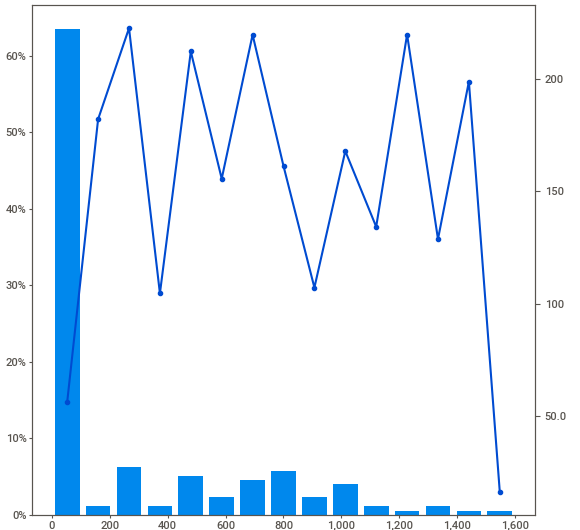
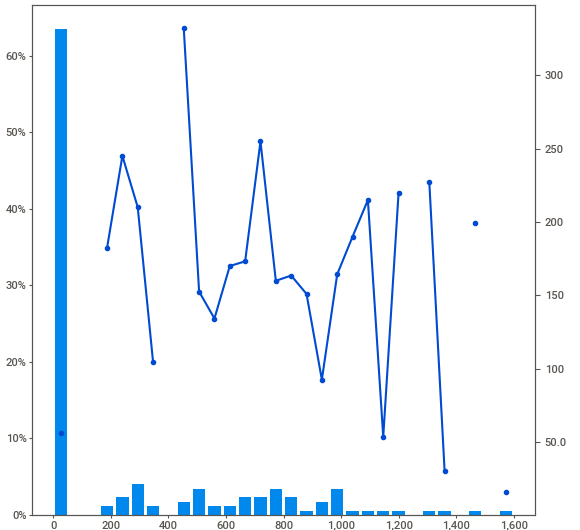
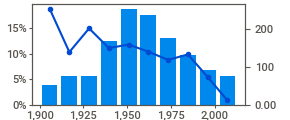
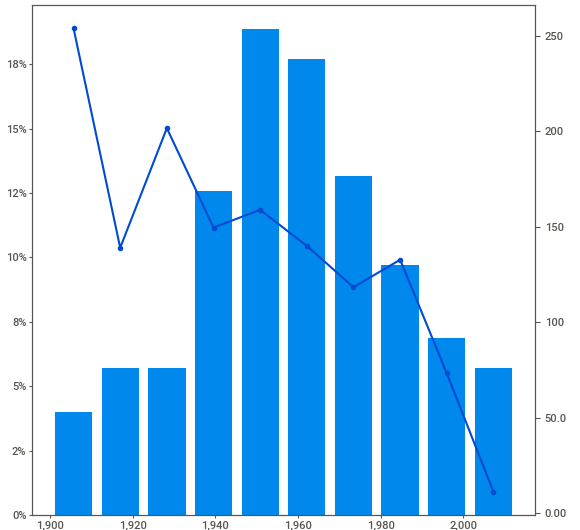
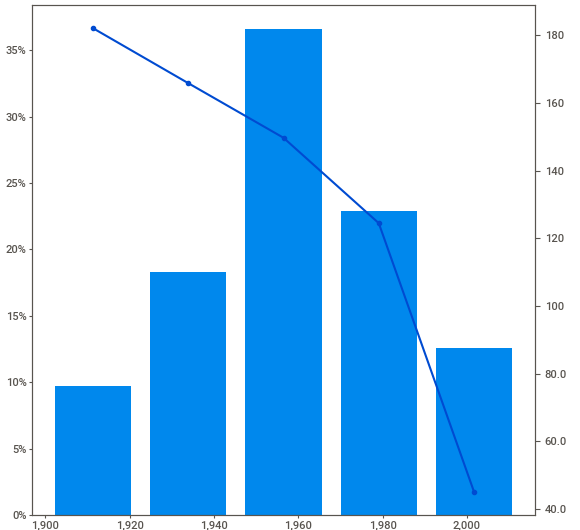
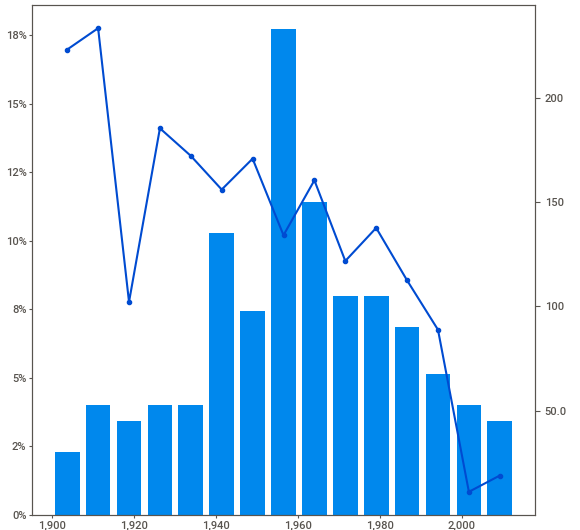
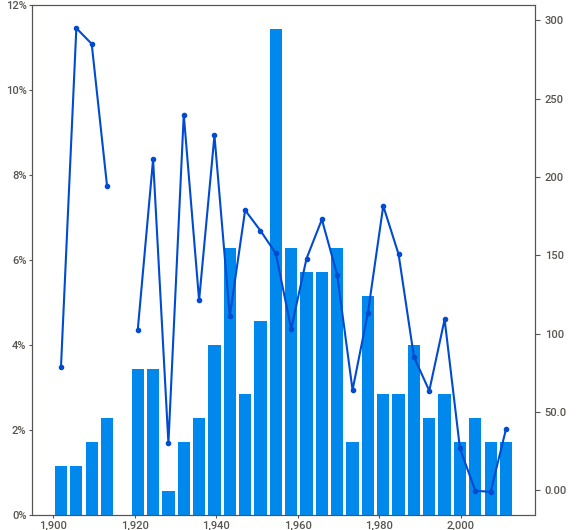
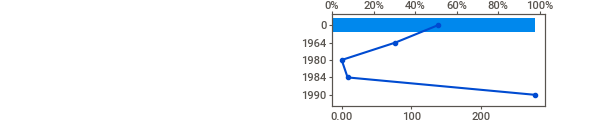
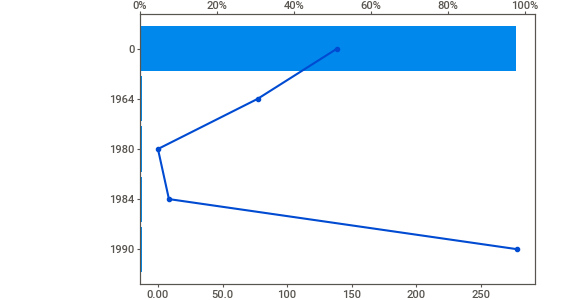
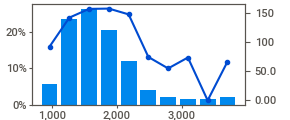
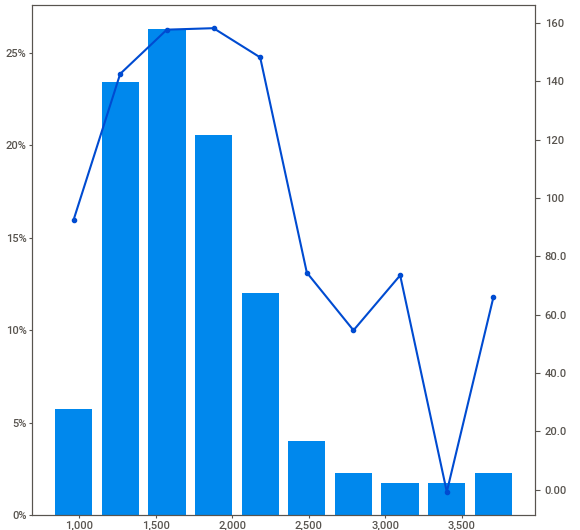
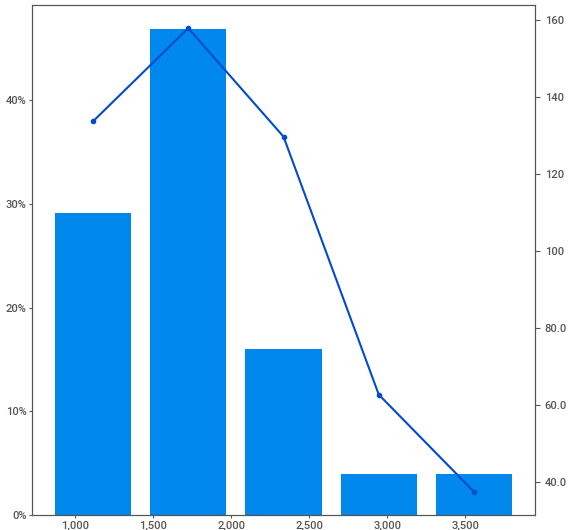
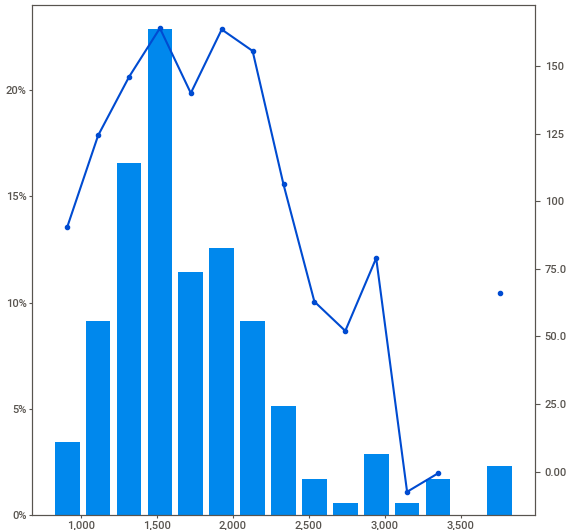
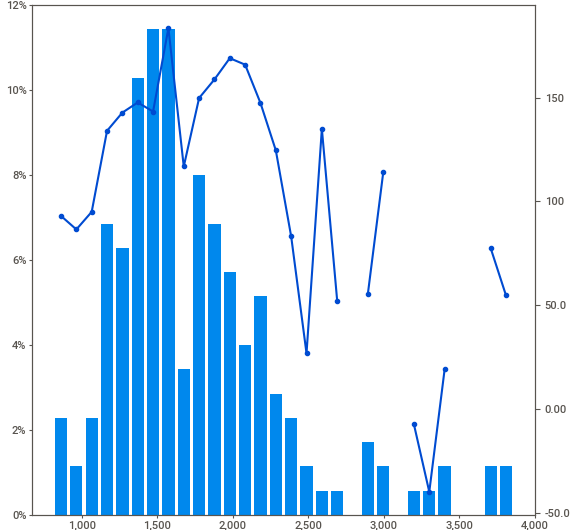
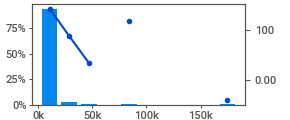
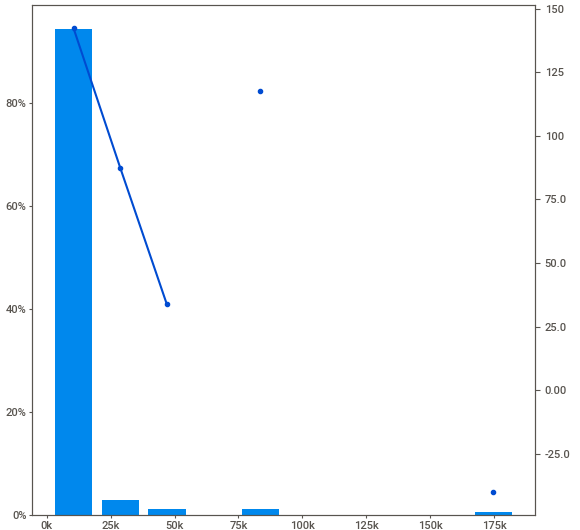
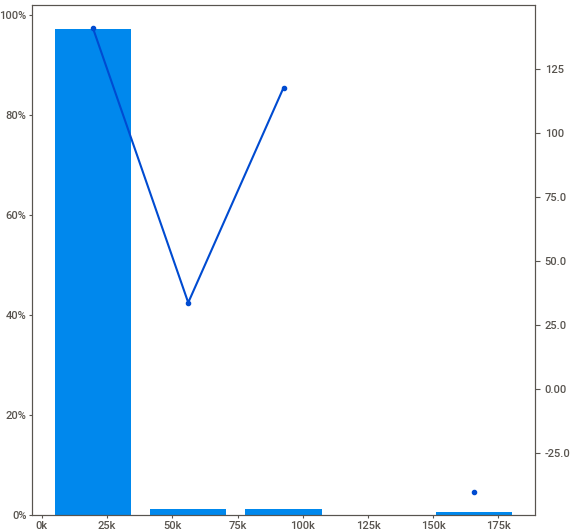
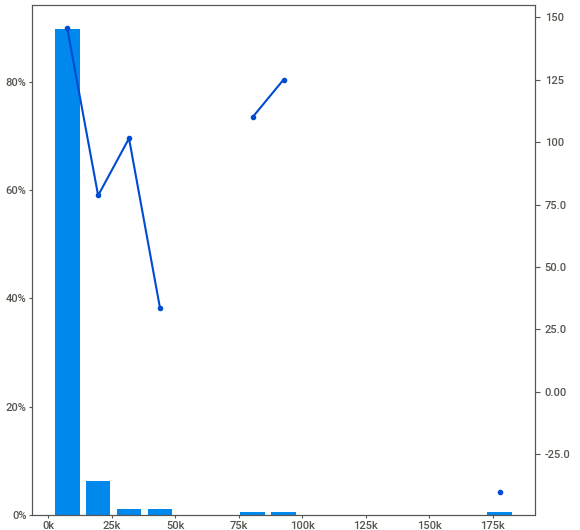
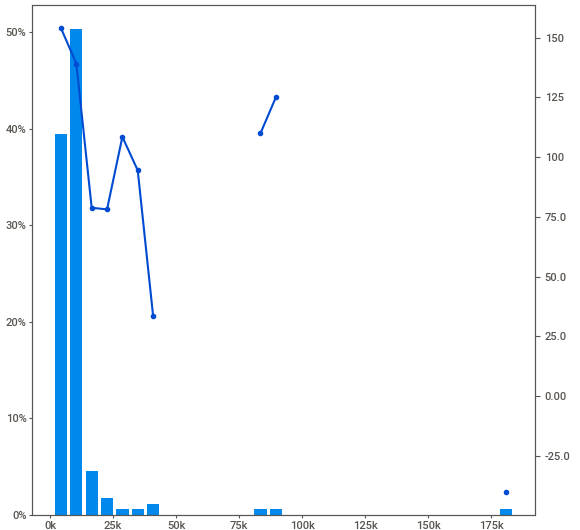
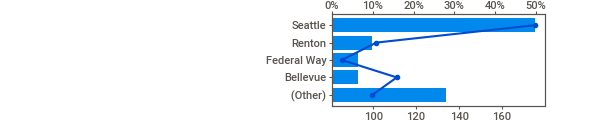
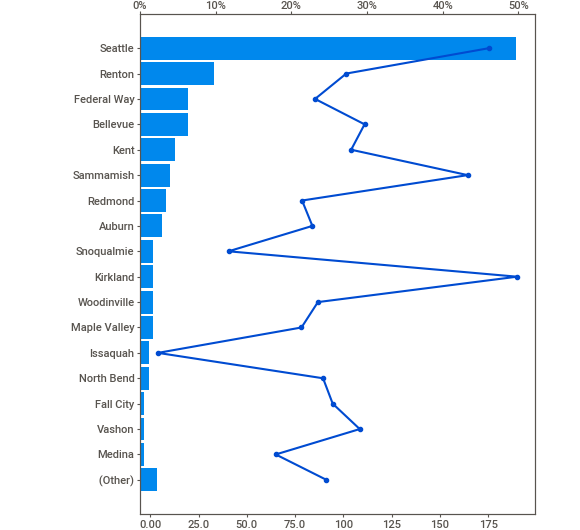
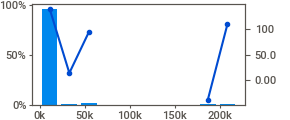
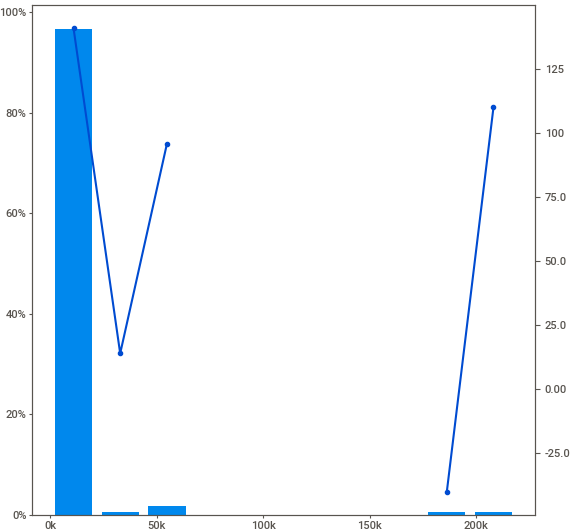
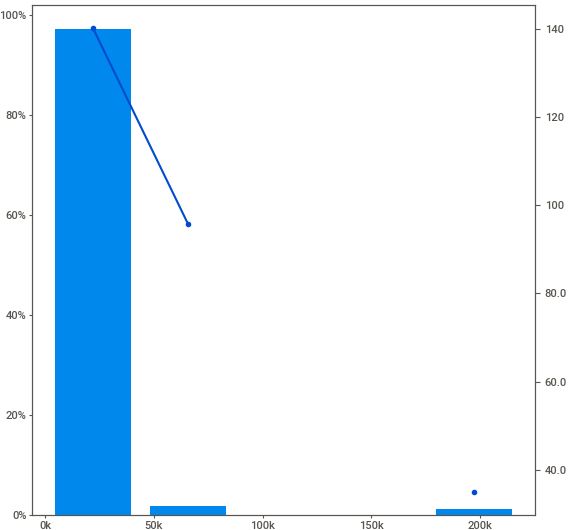
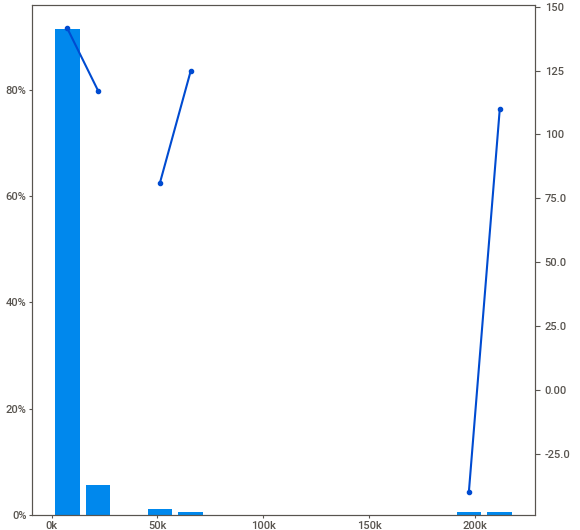
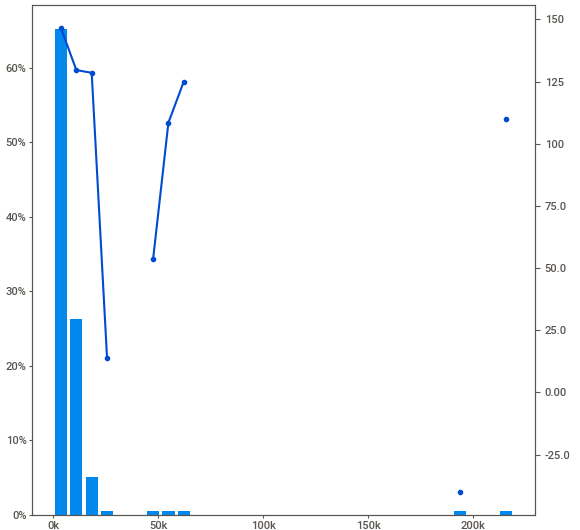
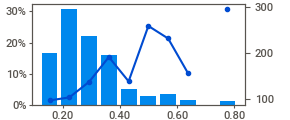
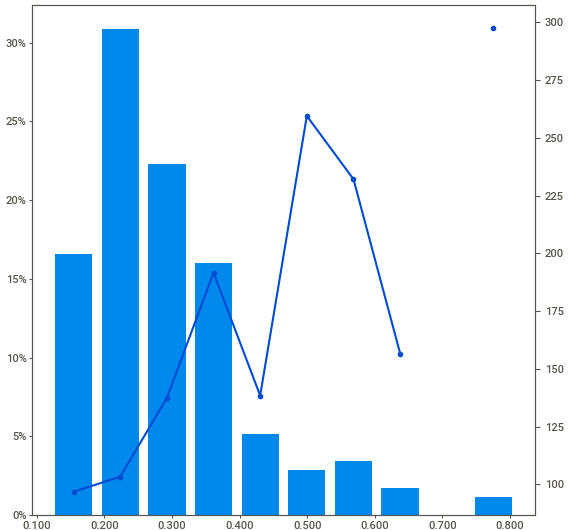
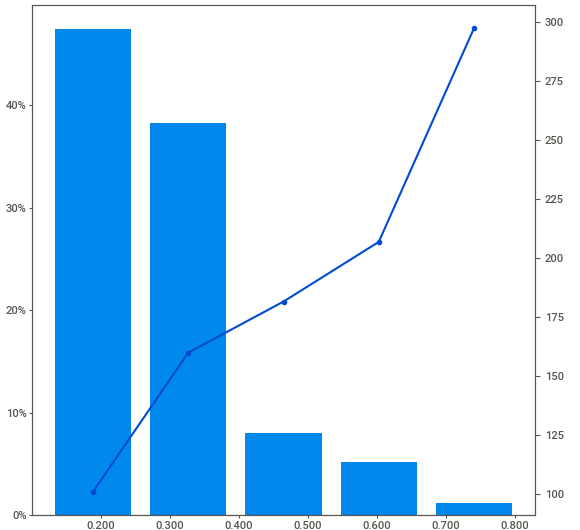
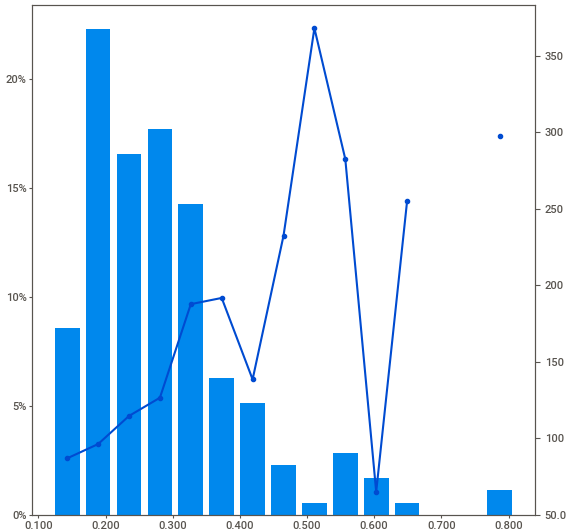
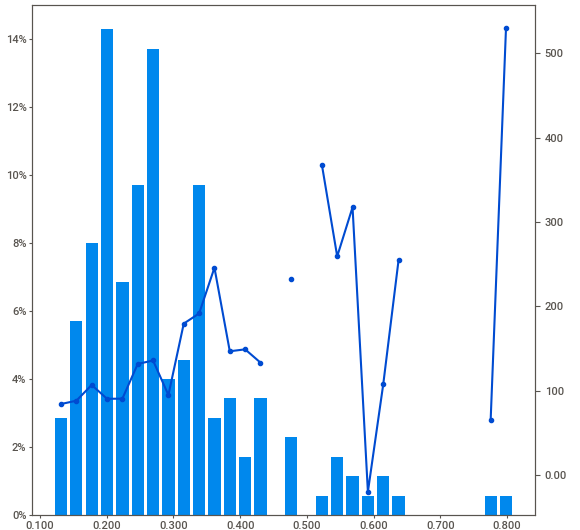
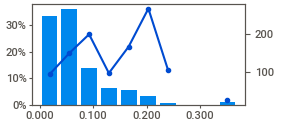
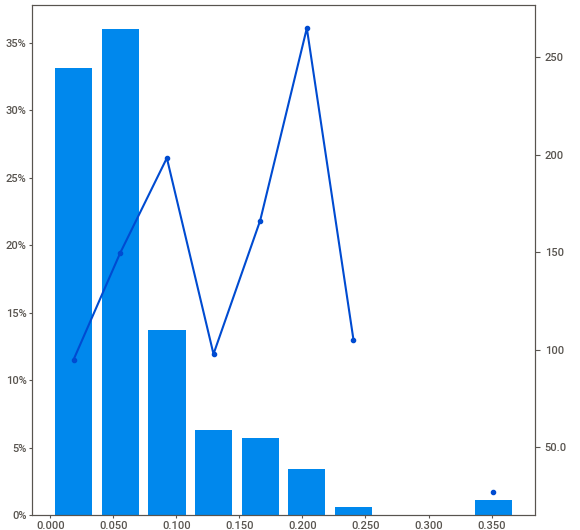
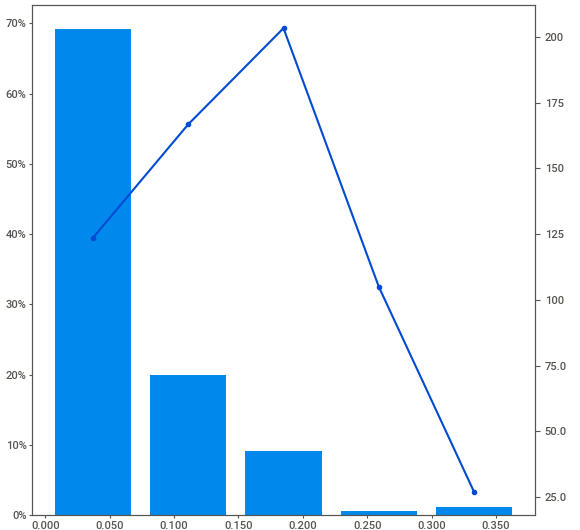
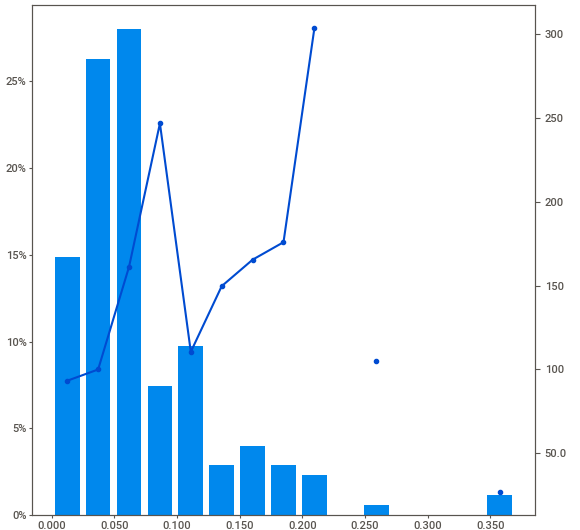
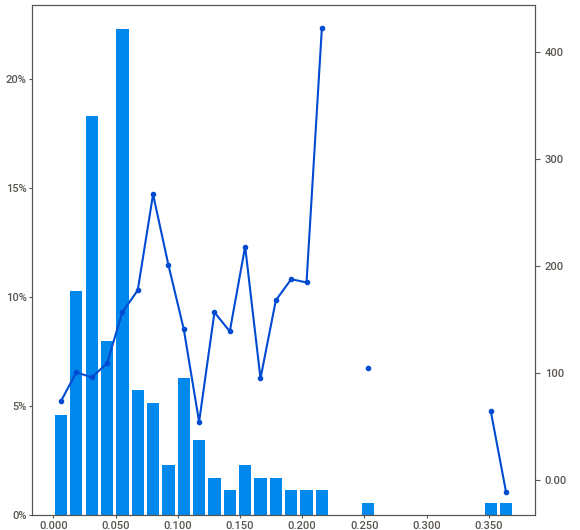
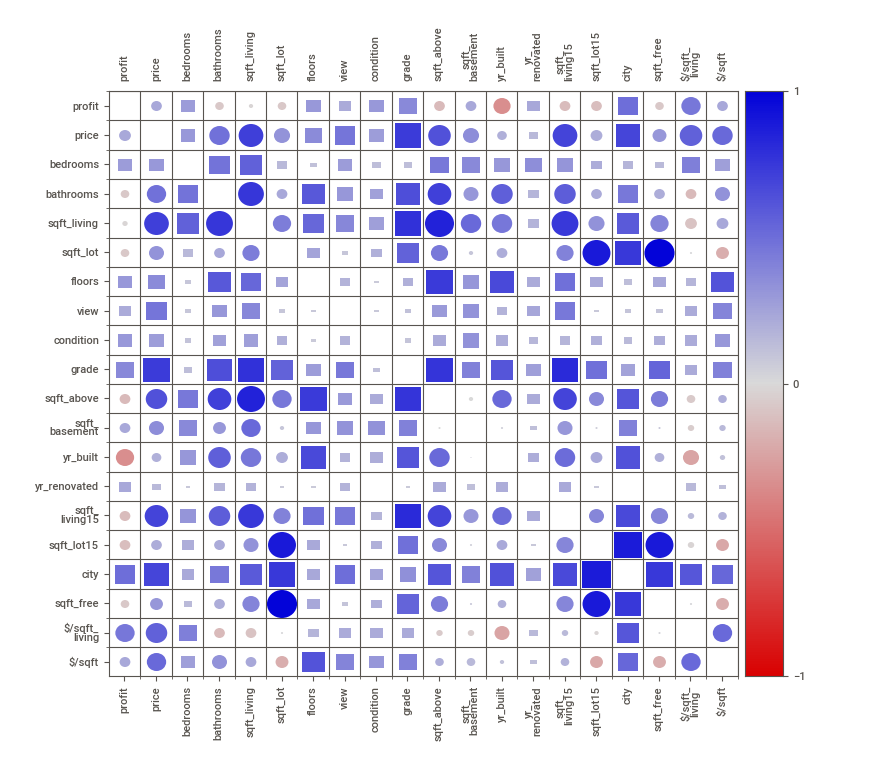
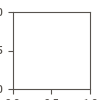

In [66]:
eda.show_notebook(layout = 'widescreen')

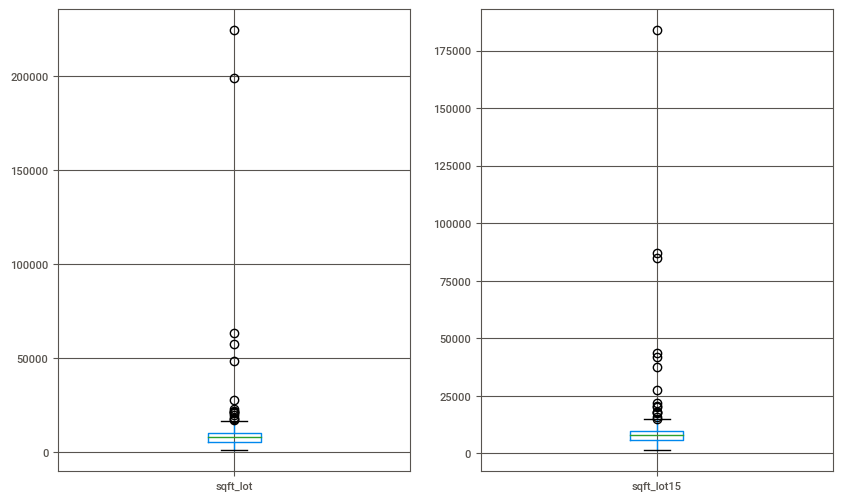

In [67]:
# Despite the presence of some exceptionally high values in sqft_lot and sqft_lot15, we decided to keep them as they seem to represent real data related to these specific properties.
plt.figure(figsize = (10,6))
plt.subplot(1, 2, 1)
df_sold2.boxplot(column = ['sqft_lot'])
plt.subplot(1, 2, 2)
df_sold2.boxplot(column = ['sqft_lot15'])
plt.show()

In [68]:
# Using seaborn lmplot to add a visual guide that highlights patterns in a dataset during exploratory data analysis

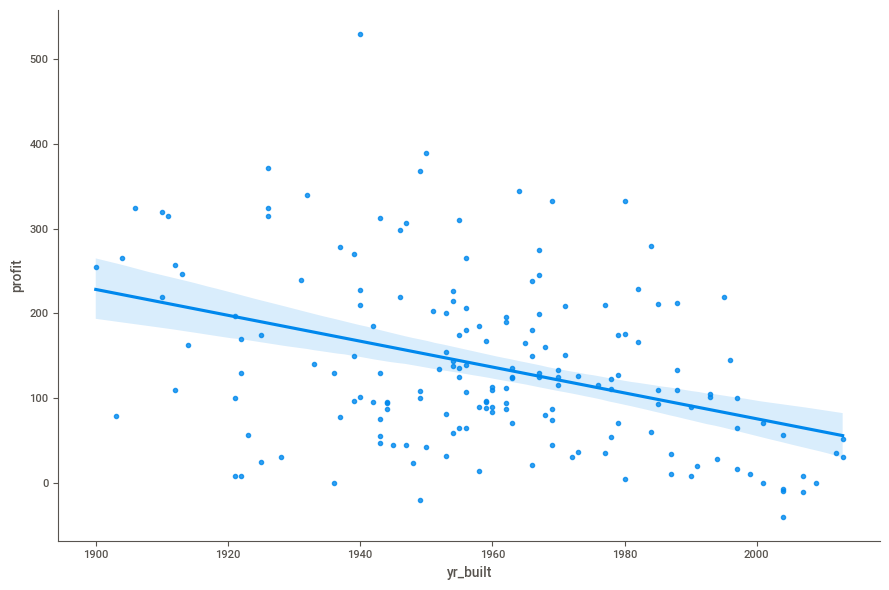

In [69]:
# Visualize the impact of year on profit
sns.lmplot(x = 'yr_built', y = 'profit', data= df_sold2, height=6, aspect=1.5)

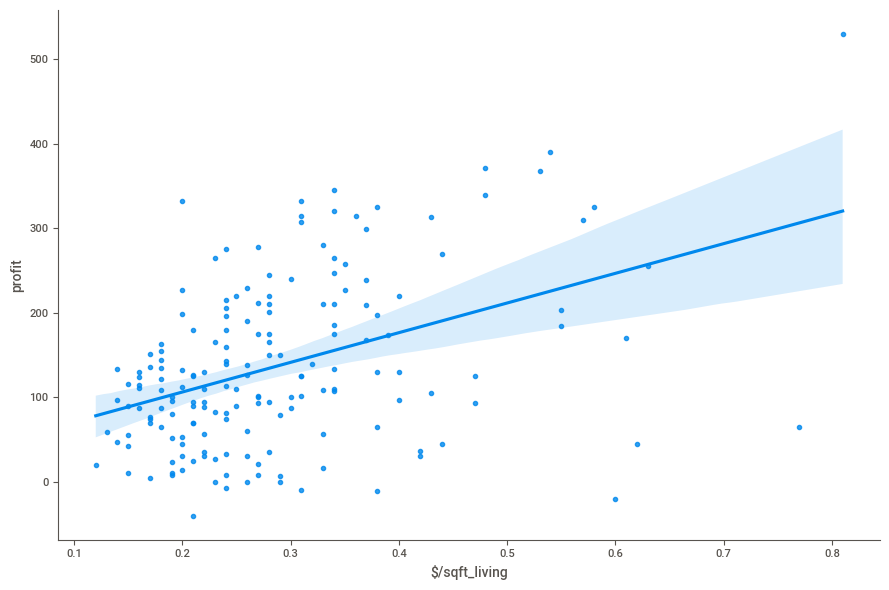

In [70]:
# Visualize the impact of price per square foot on profit
sns.lmplot(x = '$/sqft_living', y = 'profit', data= df_sold2, height=6, aspect=1.5)

# Results and Conslusions





In [77]:
# Filtering the most common characteristics of a "profitable house", ordered by the highest price per square foot and the oldest year of construction
# These are the 5 houses that we recommend to the company for investment. 
# The first house has already been sold twice and has made the highest profit of all.
df.loc[
    (df['bedrooms'].between(2, 3)) &
    (df['bathrooms'].between(1, 2)) &
    (df['grade'].between(6, 7)) &
    (df['city'] == 'Seattle') &
    (df['condition'] == 3) &
    (df['floors'] <= 1.5) &
    (df['sqft_living'] <= 2000) &
    (df['sqft_living15'].between(1200, 2300)) &
    (df['sqft_above'] <= 2000)  
    ].sort_values(by =['$/sqft_living', 'yr_built'], ascending = [False, True]).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,city,sqft_free,$/sqft_living,$/sqft,sold2_or_more,profit,fst_price,lst_price
13372,6021500970,2015-04-07,874.95000,2,1.00000,1080,4000,1.00000,0,0,...,1530,4240,Seattle,2920,0.81000,0.22000,1.00000,529.95000,345.00000,874.95000
2741,1257201095,2015-03-23,826.00000,2,1.00000,1060,6120,1.00000,0,0,...,1730,4080,Seattle,5060,0.78000,0.13000,0.00000,0.00000,0.00000,0.00000
17566,7986400945,2014-10-10,775.00000,2,1.00000,1010,3600,1.00000,0,0,...,1540,3600,Seattle,2590,0.77000,0.22000,0.00000,0.00000,0.00000,0.00000
11395,4221900030,2015-05-01,682.00000,2,1.00000,890,5000,1.00000,0,0,...,1680,5000,Seattle,4110,0.77000,0.14000,0.00000,0.00000,0.00000,0.00000
20572,9528102870,2015-03-04,818.90000,3,1.00000,1080,4120,1.00000,0,0,...,1280,3090,Seattle,3040,0.76000,0.20000,0.00000,0.00000,0.00000,0.00000


In [82]:
# Also, we recommend investing in these houses first in February, or if this is not possible, in January, as these are the months with the lowest sales and average prices.
# Additionally, we recommend April for the sale of these houses, because the market is heated and prices are higher. 

In [85]:
# These are the 5 houses the company should avoid to invest.
# On the other hand, these are the 5 houses in which the company should not invest
# They were chosen because they already had deficit on price
df_sold2.sort_values(by= 'profit', ascending = True).id.head(5).to_list()

[7167000040, 2726049071, 2767603612, 8682262400, 2619920170]

# Suggestions for next steps


In [ ]:
# Use ML regression algorithms to predict sales and consequently to predict the profit/loss of houses
# Cleanning outliers more carefully